# **PARTICIPACIÓN EN REDES SOCIALES**

#**I. Acerca del conjunto de dato**

El conjunto de datos ofrece un análisis de las interacciones en redes sociales en varias plataformas. Captura la dinámica de las interacciones de los usuarios al rastrear la **cantidad de reacciones, comentarios, acciones compartidas y tipos de publicaciones**.
Este conjunto de datos sirve como una herramienta fundamental para comprender las tendencias de la comunicación digital y mejorar las estrategias de redes sociales.
Cada entrada proporciona métricas detalladas sobre cómo las audiencias reciben las publicaciones, lo que permite obtener información basada en datos sobre el rendimiento del contenido.

Características clave:
- num_reactions: reacciones que recibe una publicación, que encapsula la interacción general.
- num_comments: refleja el nivel de interacción de la audiencia a través de los comentarios.
- num_shares: indica la viralidad de la publicación al contar cuántas veces se ha compartido.
- num_likes: realiza un seguimiento de la cantidad de me gusta, lo que muestra la aprobación general del contenido.
- num_loves: captura reacciones de afecto más intensas a las publicaciones.
- num_wows: mide el factor de sorpresa o asombro de la publicación.
- num_hahas: cuenta los casos de diversión o risa provocados por la publicación.
- num_sads: refleja el número de reacciones tristes, lo que indica el impacto emocional.
- num_angrys: realiza un seguimiento de las reacciones de enojo, destacando el contenido que puede ser controvertido o perturbador.

Todas estas variables se representan como tasas y toman valores que varian entre 0 y 1.

La base de datos también cuenta con los siguientes campos:
- status_type_link: indicador binario de si la publicación incluye un enlace, lo que mejora su valor informativo.
- status_type_photo: identifica publicaciones con fotos.
- status_type_status: marca publicaciones textuales, centrándose en la participación del contenido escrito.
-status_type_video: distingue publicaciones con videos, importante para la participación en contenido dinámico.

Estas variables toman valores 0 y 1, siendo 1 el indicativo de la presencia del tipo de status.

Este conjunto de datos no solo ayuda a medir la efectividad de las campañas en las redes sociales, sino que también respalda el desarrollo de estrategias de marketing específicas y los esfuerzos de optimización de contenido para maximizar la participación de la audiencia.

*Fuente: https://www.kaggle.com/datasets/mehmetisik/livedataset/data*

Se usará esta base de datos para aplicar modelos no supervisados que permita la clasificación de las publicaciones con el objetivo de mejorar las estrategias de comunicación en redes sociales.

#**II. Análisis descriptivo de los datos**

Se instalan las librerias y la base de dato a trabajar para luego poder comenzar con el análisis descriptivo de los datos.

In [3]:
#IMPORTAMOS LIBRERIAS

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#BBDD

from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ICARO/SPRINT1/DATA/Live.csv'

df = pd.read_csv(file_path, delimiter= ',')

#df = df.astype(str).applymap(lambda x: x.replace('.', ',')) #cambia . por ,

#Previsualización de la tabla

df.head()

Mounted at /content/drive


num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.112314      0.024393    0.076519   0.091720   0.140030  0.010791   
1       0.031847      0.000000    0.000000   0.031847   0.000000  0.000000   
2       0.048195      0.011243    0.016647   0.043312   0.031963  0.003597   
3       0.023567      0.000000    0.000000   0.023567   0.000000  0.000000   
4       0.045223      0.000000    0.000000   0.043312   0.013699  0.000000   

   num_hahas  num_sads  num_angrys  status_type_link  status_type_photo  \
0   0.006369  0.019608         0.0               0.0                0.0   
1   0.000000  0.000000         0.0               0.0                1.0   
2   0.006369  0.000000         0.0               0.0                0.0   
3   0.000000  0.000000         0.0               0.0                1.0   
4   0.000000  0.000000         0.0               0.0                1.0   

   status_type_status  status_type_video  
0                 0.0                1.0  
1                 0.0                0.0  
2                 0.0                1.0  
3                 0.0                0.0  
4                 0.0                0.0

La base cuenta con 7050 observaciones y 13 variables. Ninguna de las variables presenta valores nulos y si bien todas figuran como variables de tipo float64 (numéricas), los campos **status_type_link, status_type_photo, status_type_status	y status_type_video**	son booleanos. Los mismos toman valor 1 si la publicación corresponde al status correspondiente a esa columna.

In [5]:
df.shape

(7050, 13)

In [6]:
df.dtypes

num_reactions         float64
num_comments          float64
num_shares            float64
num_likes             float64
num_loves             float64
num_wows              float64
num_hahas             float64
num_sads              float64
num_angrys            float64
status_type_link      float64
status_type_photo     float64
status_type_status    float64
status_type_video     float64
dtype: object

In [7]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print(porcentaje_nulos)


num_reactions         0.0
num_comments          0.0
num_shares            0.0
num_likes             0.0
num_loves             0.0
num_wows              0.0
num_hahas             0.0
num_sads              0.0
num_angrys            0.0
status_type_link      0.0
status_type_photo     0.0
status_type_status    0.0
status_type_video     0.0
dtype: float64


A fines prácticos las variables **status_type_link,	status_type_photo,	status_type_status,	status_type_video** se resumen en una única columna que indica el tipo de publicación.

In [8]:
# Definir las columnas de status
Y = ["status_type_link", "status_type_photo", "status_type_status", "status_type_video"]

# Crear la nueva columna con el nombre de la variable donde hay un 1
df["status_type"] = df[Y].idxmax(axis=1).str.replace("status_type_", "")

# Eliminar las columnas originales
df.drop(columns=Y, inplace=True)

df.head(2)



num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.112314      0.024393    0.076519   0.091720    0.14003  0.010791   
1       0.031847      0.000000    0.000000   0.031847    0.00000  0.000000   

   num_hahas  num_sads  num_angrys status_type  
0   0.006369  0.019608         0.0       video  
1   0.000000  0.000000         0.0       photo

Todas las **variables de tipo cuantitativas** presentan una distribución asimétrica hacia la derecha con una alta proporción de valores iguales a cero, es decir nula interacción.

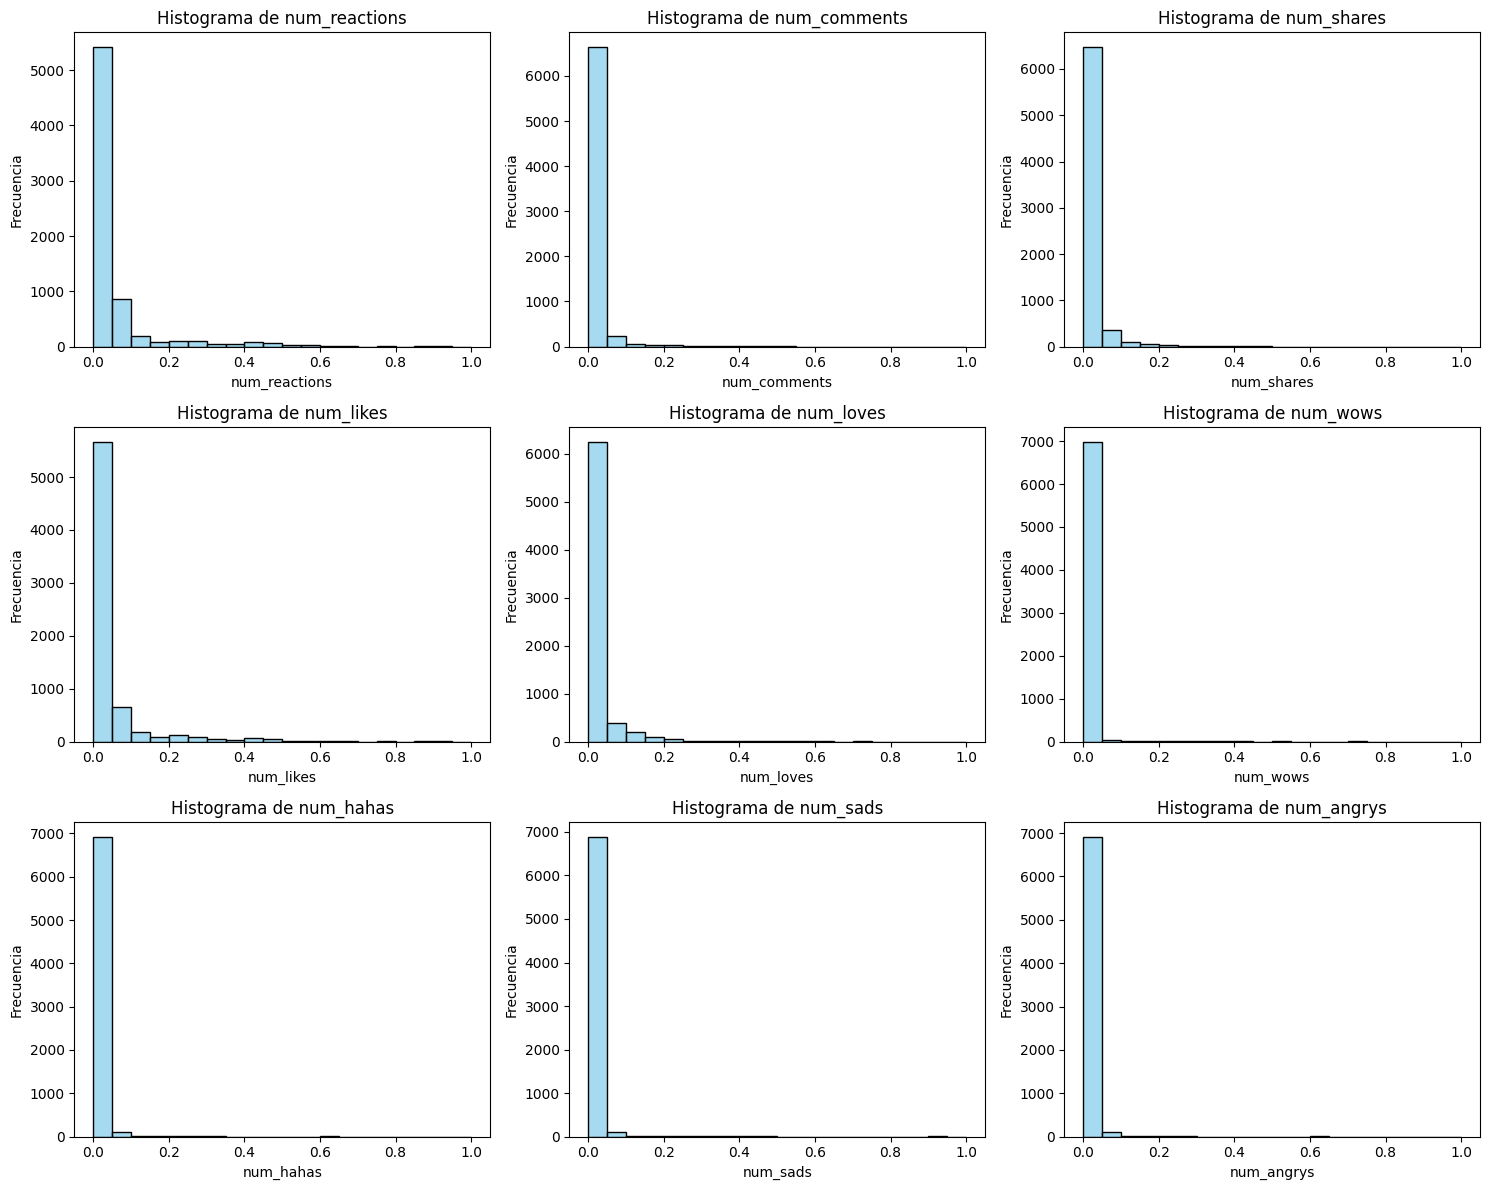

In [9]:
#GRAFICAR VARIABLES CUANTITATIVAS

# Definir las columnas numéricas
numeric_cols = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

# Crear una figura con subgráficos (3x3 para 9 columnas)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Graficar cada columna en su respectivo histograma
for i, col in enumerate(numeric_cols):
    ax = axes[i//3, i%3]  # Asignar los subgráficos en 3x3
    # Graficar el histograma con una curva de densidad (KDE)
    sns.histplot(df[col], bins=20, ax=ax, color="skyblue")
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Al analizar la única variable de tipo categórica (tipo de status), se observa que el 60% de las publicaciones contienen fotos, el 33% corresponde a videos, mientras que las publicaciones de solo texto o enlaces representan menos del 6%.

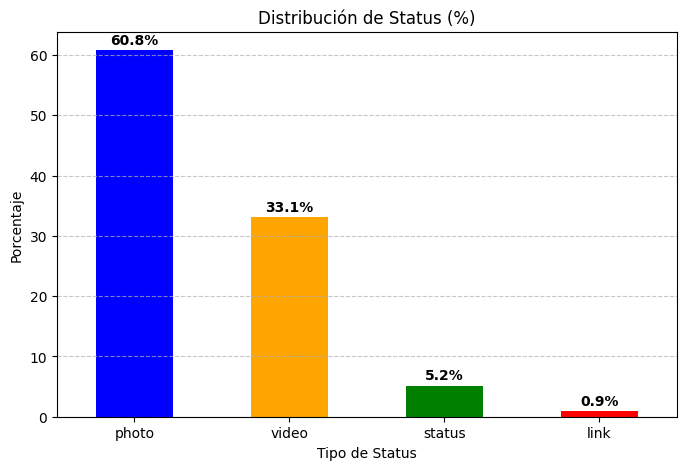

In [10]:
#GRAFICAR VARIABLE CATEGORICA

# Contar la cantidad de cada tipo de status en porcentaje
status_counts = df["status_type"].value_counts(normalize=True) * 100

# Crear gráfico de barras con porcentajes
plt.figure(figsize=(8, 5))
status_counts.plot(kind="bar", color=["blue", "orange", "green", "red"])

# Personalizar etiquetas
plt.xlabel("Tipo de Status")
plt.ylabel("Porcentaje")
plt.title("Distribución de Status (%)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores encima de las barras
for i, v in enumerate(status_counts):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Mostrar gráfico
plt.show()



Para evaluar la relación entre las variables numéricas se realiza una matriz de correlación. De la misma se desprenden las siguientes conclusiones:

* **num_reactions y num_likes** tienen una correlación casi perfecta (0.99). Esto indica que la mayoría de las reacciones provienen de "likes".

* **num_shares y num_loves** tienen una correlación alta (0.82). Esto sugiere que los posts con más "loves" también se comparten más.

* **num_comments y num_shares** tienen una correlación moderada (0.64). Las publicaciones con más comentarios tienden a ser compartidas más.

Las emociones **num_wows, num_hahas, num_sads, num_angrys** tienen correlaciones bajas con la mayoría de las variables. Esto podría significar que no tienen un impacto fuerte en otras interacciones como "likes" o "shares".

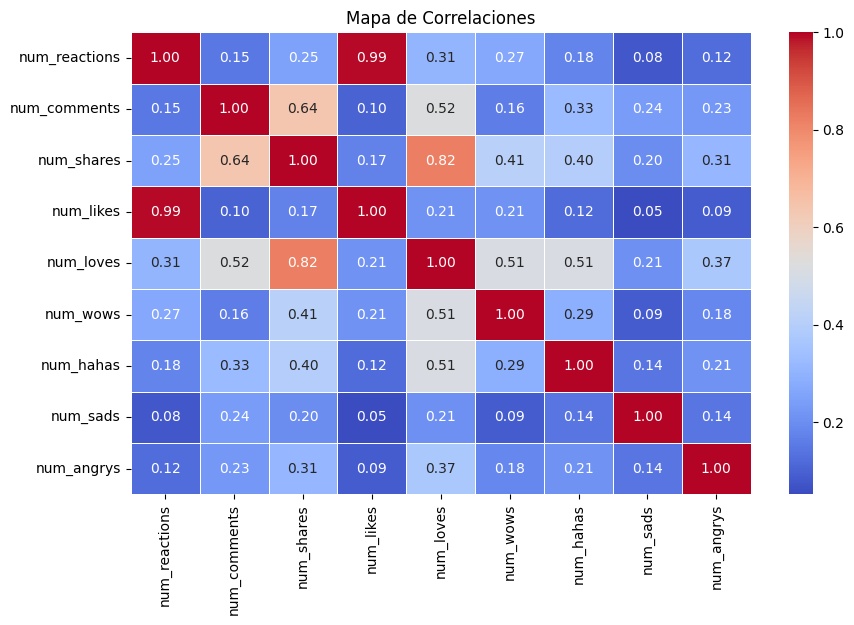

In [740]:
#MATRIZ DE CORRELACIÓN

# Seleccionar solo las columnas numéricas y convertirlas si es necesario
cols_numeric = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

# Convertir a valores numéricos (por si hay strings)
df_numeric = df[cols_numeric].apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Graficar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlaciones")
plt.show()



#**III. Selección de variables**

Para aplicar técnicas de agrupamiento no supervisadas se realiza una selección de variables. Las mismas deben ser representativas pero no redundantes. Por lo cual:

**Se va a incluir las variables:**

* num_reactions (representa la interacción general)

* num_shares (representa difusión)


**Se va a excluir las variables:**

* num_likes (ya está representado por num_reactions)

* num_loves (similar a num_shares)

* num_wows, num_hahas, num_sads, num_angrys (tienen correlaciones bajas)


Por el momento no se incluye la variable num_comments ya que tiene una correlación moderada con num_shares.



A continuación se realiza un gráfico de dispersión entre las dos variables a utilizar. **En primera instancia se ven valores extremos en los campos de interés**.
Además este gráfico cuenta con información respecto al **tipo de status**. Los **videos a mayor número de interacciones tiene un número mayor de compartidos**. Mientras que en las publicaciones con fotos no se da esa relación: a mayor reacciones el número de compartidos permanece bajo y constante.

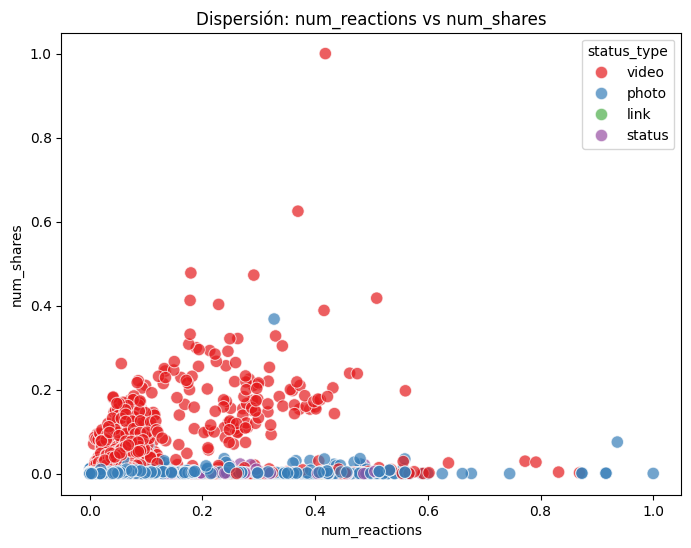

In [741]:
#GRAFICO VARIABLES QUE VOY A UTILIZAR Y SU VINCULO

# Definir combinaciones de variables
pairs = [('num_reactions', 'num_shares')]

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar dispersión con colores según 'pred'
x_var, y_var = pairs[0]  # Extraemos la combinación de variables
sns.scatterplot(data=df, x=x_var, y=y_var, hue="status_type", palette="Set1", alpha=0.7, s=80, ax=ax)

# Título y etiquetas
ax.set_title(f'Dispersión: {x_var} vs {y_var}')
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)

# Mostrar la leyenda
plt.legend(title="status_type")
plt.show()



A fines practicos se convierte las variable status en numérica. Donde fotos, videos, link y status se corresponden a los números 0,1,2 y 3 respectivamente.


In [742]:
df['status_num'] = pd.factorize(df['status_type'])[0]
df.head(2)

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.112314      0.024393    0.076519   0.091720    0.14003  0.010791   
1       0.031847      0.000000    0.000000   0.031847    0.00000  0.000000   

   num_hahas  num_sads  num_angrys status_type  status_num  
0   0.006369  0.019608         0.0       video           0  
1   0.000000  0.000000         0.0       photo           1

#**IV. MODELO NO SUPERVISADO**

Su aplicará la técnica k-means utilizando los campos **num_reactions** y **num_shares** para agrupar publicaciones y descubrir cuáles generan más interacción y difusión para la empresa.


#**IV-1. MODELO NO SUPERVISADO: con outliers**

En una primera instancia se escalan los datos para evitar sesgos. Una vez realizado este paso se busca el número óptimo de clusters por medio del Método del Codo y Silhouette.

El método del codo muestra un primer quiebre en el cluster k=3 pero el mismo se vuelve constante luego del cluster 6 u 8. En el caso de Silhouette el punto más alto es en el cluster 3 y luego el 6.

Se aplicará k-means usando 3 cluster ya que es el valor coincidente en ambas técnicas.


In [743]:
#DEFINIMOS X y ESTANDARIZAMOS LAS VARIABLES

X = df[['num_reactions', 'num_shares']]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

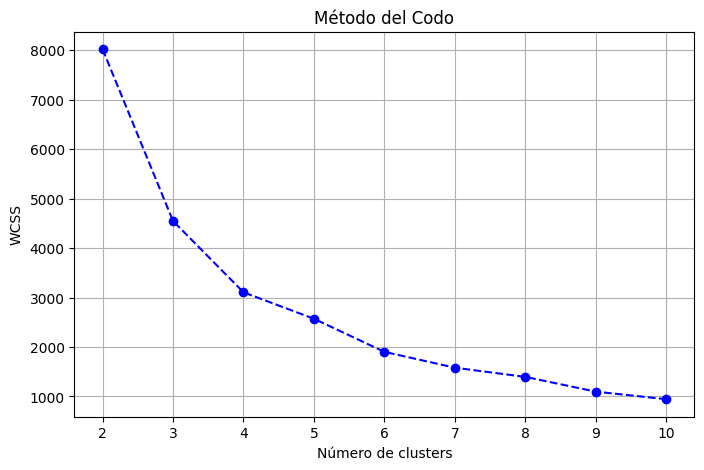

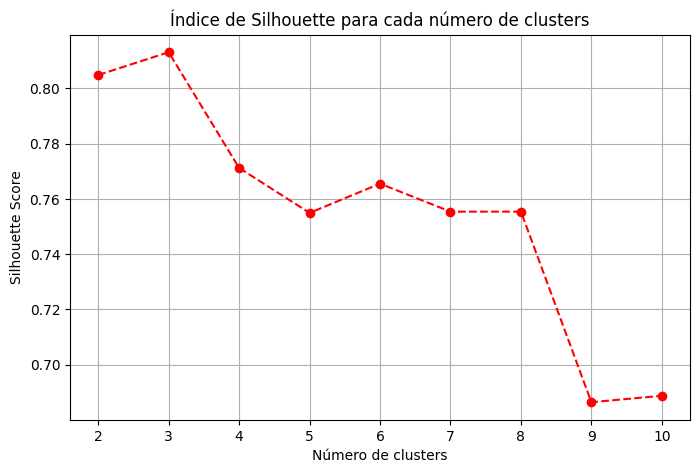

In [744]:
# APLICAMOS METODO DEL CODO Y SILHOUETTE PARA DEFINIR EL NRO DE CLUSTER A UTILIZAR

wcss = []
silhouette_scores = []  # Lista para almacenar los valores de Silhouette

for i in range(2, 11):  # Comenzamos desde 2 porque silhouette_score no se calcula con 1 cluster
    kmeans_nuevo = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters = kmeans_nuevo.fit_predict(X)
    wcss.append(kmeans_nuevo.inertia_)

    # Calcular índice de Silhouette y almacenarlo
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

# Gráfico del Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Gráfico del Índice de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Índice de Silhouette para cada número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [745]:
# APLICA K-MEANS PARA 3 CLUSTER

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)

In [746]:
#CLUSTER
df['pred']=y_kmeans


In [747]:
#CLUSTER
Grupo_0 = df[df['pred'] == 0]
Grupo_1 = df[df['pred'] == 1]
Grupo_2 = df[df['pred'] == 2]

Al ajustar el modelo vemos que las publicaciones no quedan balanceadas en los cluster. El grupo 0 cuenta con la mayoría de las publicaciones(6411), seguido del grupo 2 que tiene 381 publicaciones. Por último el cluster 1 tiene 381 publicaciones.

In [748]:
df.groupby(['pred']).count()

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
pred                                                                            
0              6411          6411        6411       6411       6411      6411   
1               258           258         258        258        258       258   
2               381           381         381        381        381       381   

      num_hahas  num_sads  num_angrys  status_type  status_num  
pred                                                            
0          6411      6411        6411         6411        6411  
1           258       258         258          258         258  
2           381       381         381          381         381

El gráfico de dispersión permite caracterizar a las publicaciones de cada cluster según interacciones y difusión:

* Grupo 0: baja frecuencia de interacciones y viralización.

* Grupo 1: número bajo de reacciones pero una frecuencia mayor de publicaciones compartidas.

* Grupo 2: número alto de reacciones y muy baja (casi nula) de publicaciones compartidas.

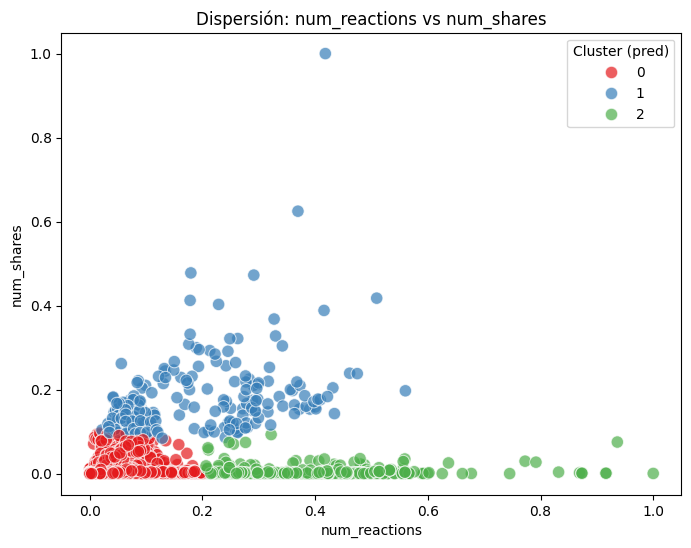

In [749]:
#GRÁFICO DE DISPERSIÓN POR CLUSTER

# Definir combinaciones de variables
pairs = [('num_reactions', 'num_shares')]

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar dispersión con colores según 'pred'
x_var, y_var = pairs[0]  # Extraemos la combinación de variables
sns.scatterplot(data=df, x=x_var, y=y_var, hue="pred", palette="Set1", alpha=0.7, s=80, ax=ax)

# Título y etiquetas
ax.set_title(f'Dispersión: {x_var} vs {y_var}')
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)

# Mostrar la leyenda
plt.legend(title="Cluster (pred)")
plt.show()



A continuación se analizan los cluster en base a otras caracteristicas no ajustadas en el modelo:

* Del análisis por cluster se desprende que el cluster 1 es en su mayoría publicaciones realizadas con videos. Mientras que el cluster 0 y 2 en su mayoría son fotos, seguidas por videos. Entre estos cluster la diferencia se centra en que el cluster 2 tiene un número mayor de publicaciones con texto.

In [765]:
#ANALISIS DE CLUSTER POR STATUS (eje horizontal suma 100%)

# Crear la tabla de conteo
conteo_tabla = df.groupby(['pred', 'status_type']).size().unstack()
# Convertir a porcentaje fila
porcentaje_tabla = conteo_tabla.div(conteo_tabla.sum(axis=1), axis=0) * 100
porcentaje_tabla


status_type      link      photo     status      video
pred                                                  
0            0.764311  63.547029   4.585868  31.102792
1                 NaN   0.387597        NaN  99.612403
2            3.674541  55.905512  18.635171  21.784777

* Se calcula la mediana de las publicaciones para cada una de las variables cuantitativas. Se selecciona esta medida resumen ya que los datos presentan una distribución asimétrica y outliers.

Respecto al grupo 0 no podemos sumar mayor información. Confirmamos que son publicaciones con bajas reacciones, comentarios y nula viralización.

El grupo 1 tiene un número más alto de reacciones, comentarios y viralizaciones respercto al grupo 0. Se destaca por tener valores altos de reacciones tipo **loves**.

El grupo 2 se destaca por tener muchas reacciones de tipo **likes** pero nula viralización y comentarios.

In [764]:
#ANALISIS DE CLUSTER POR VARIABLES CONTINUAS

campos_interes = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

# Ajusta según tus variables
promedios_cluster = df.groupby('pred')[campos_interes].median()

print(promedios_cluster)


      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
pred                                                                            
0          0.009766      0.000143    0.000000   0.009554   0.000000  0.000000   
1          0.100637      0.088232    0.143400   0.077495   0.184932  0.010791   
2          0.378769      0.001000    0.000584   0.376858   0.000000  0.000000   

      num_hahas  num_sads  num_angrys  
pred                                   
0      0.000000  0.000000    0.000000  
1      0.025478  0.019608    0.032258  
2      0.000000  0.000000    0.000000  


Por último se realiza un análisis en los distintos escenarios de cantidad de cluster según silhoette. Como se vio anteriormente el valor de silhouette más alto se da para el escenario con 3 cluster. El problema en este caso es que la cantidad de publicaciones por clustes está desbalanceada y los cluster 1 y 2 tienen valores por debajo del promedio, inclusos algunos son negativos lo que indica posible superposición a otros cluster.

Al analizar las otras posibilidades no se encuentran escenarios con mejoras.

Para n_clusters = 2 El promedio del score de silhouette es:  0.8045610386945276
Para n_clusters = 3 El promedio del score de silhouette es:  0.8123434265933794
Para n_clusters = 4 El promedio del score de silhouette es:  0.7712042754324152
Para n_clusters = 5 El promedio del score de silhouette es:  0.7671703134237782
Para n_clusters = 6 El promedio del score de silhouette es:  0.7496731846588622
Para n_clusters = 7 El promedio del score de silhouette es:  0.7628708537089028
Para n_clusters = 8 El promedio del score de silhouette es:  0.7566269899680198
Para n_clusters = 9 El promedio del score de silhouette es:  0.6879988410630191


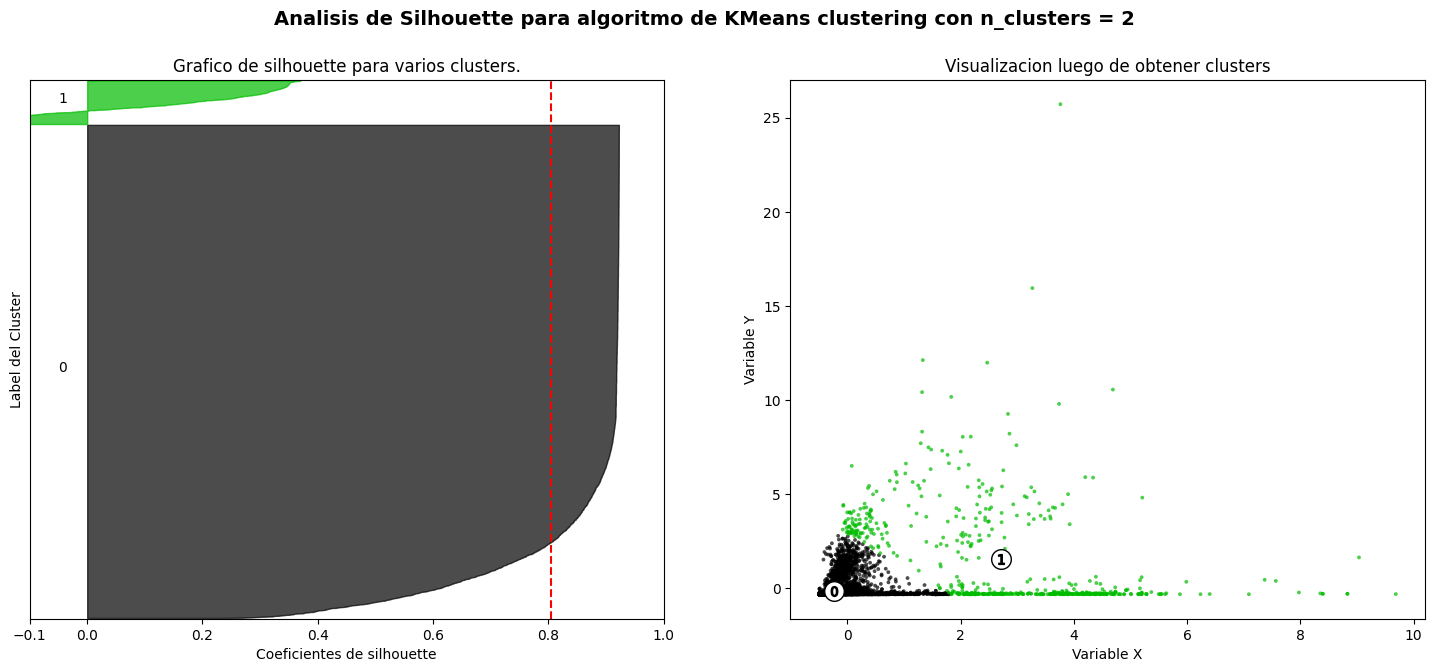

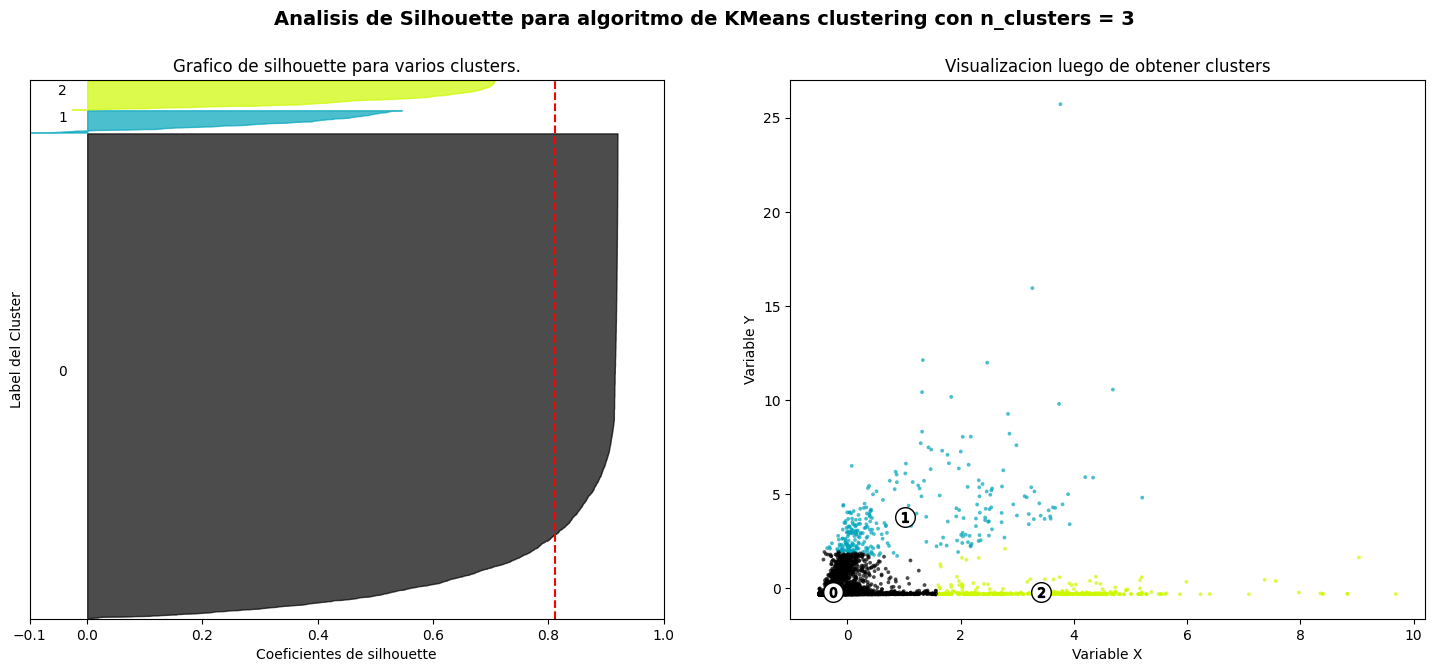

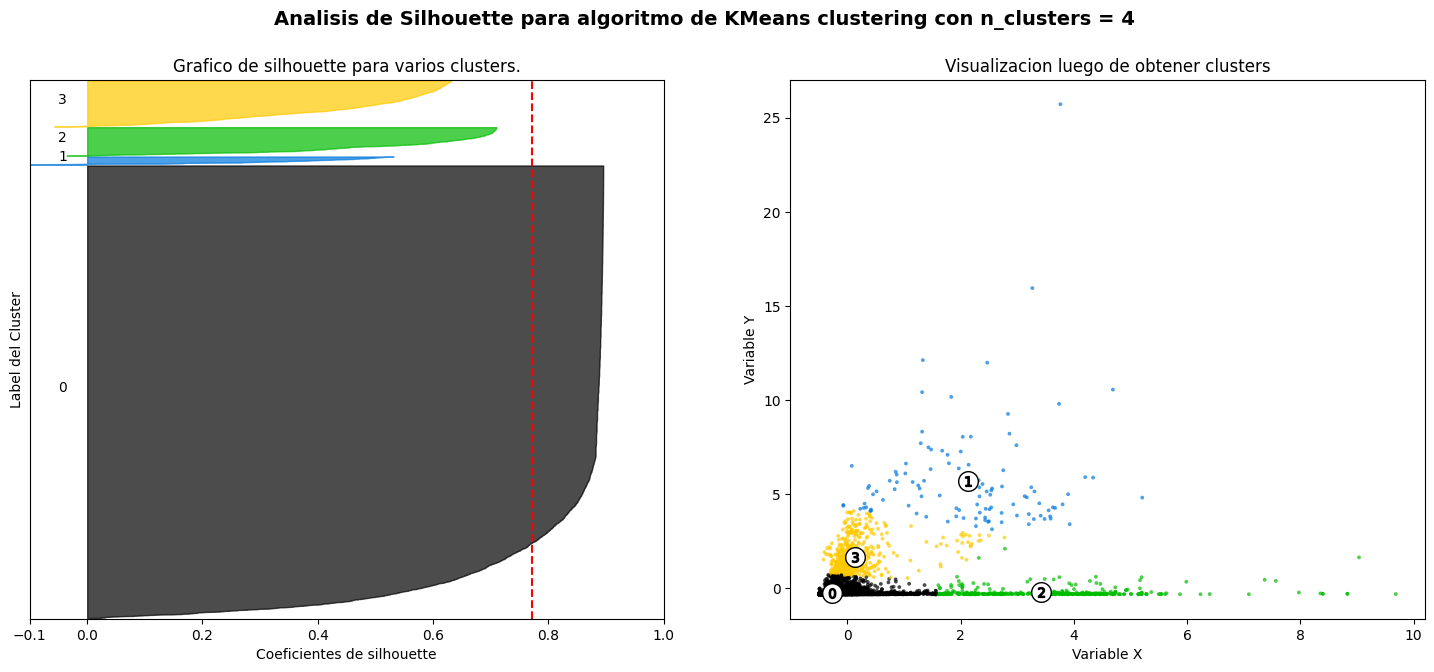

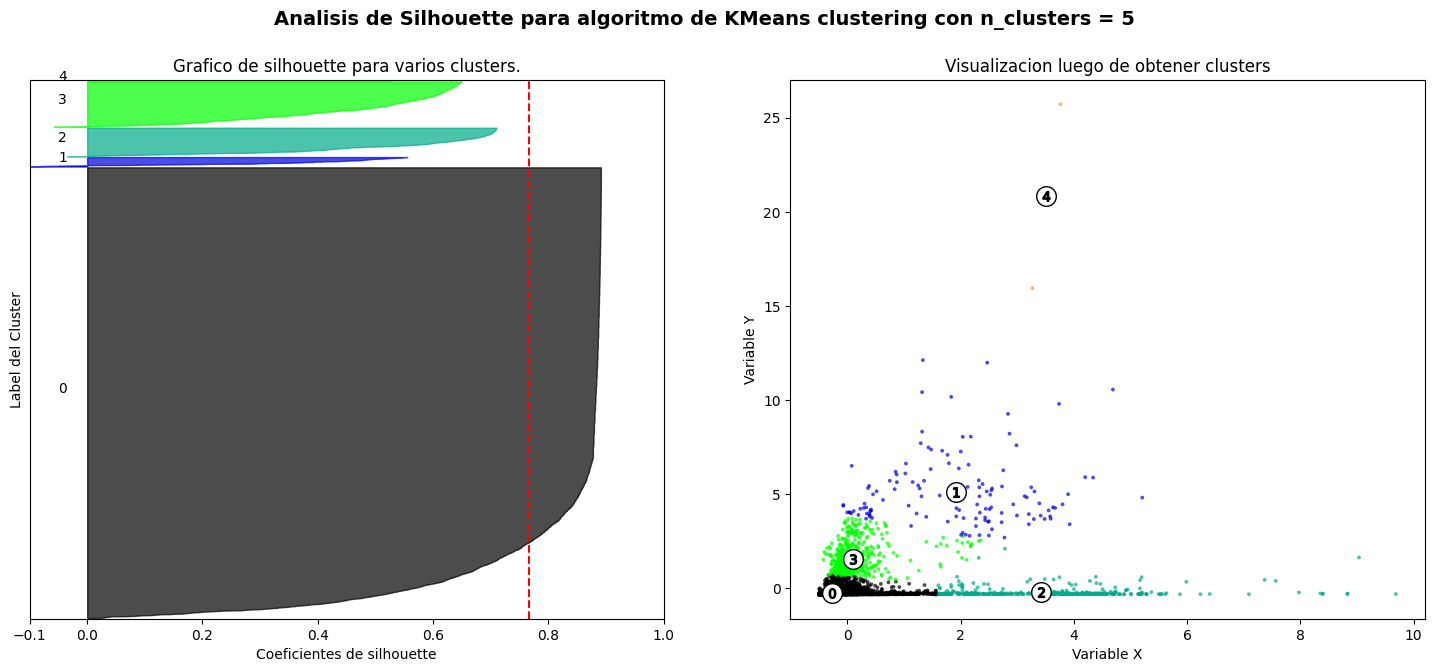

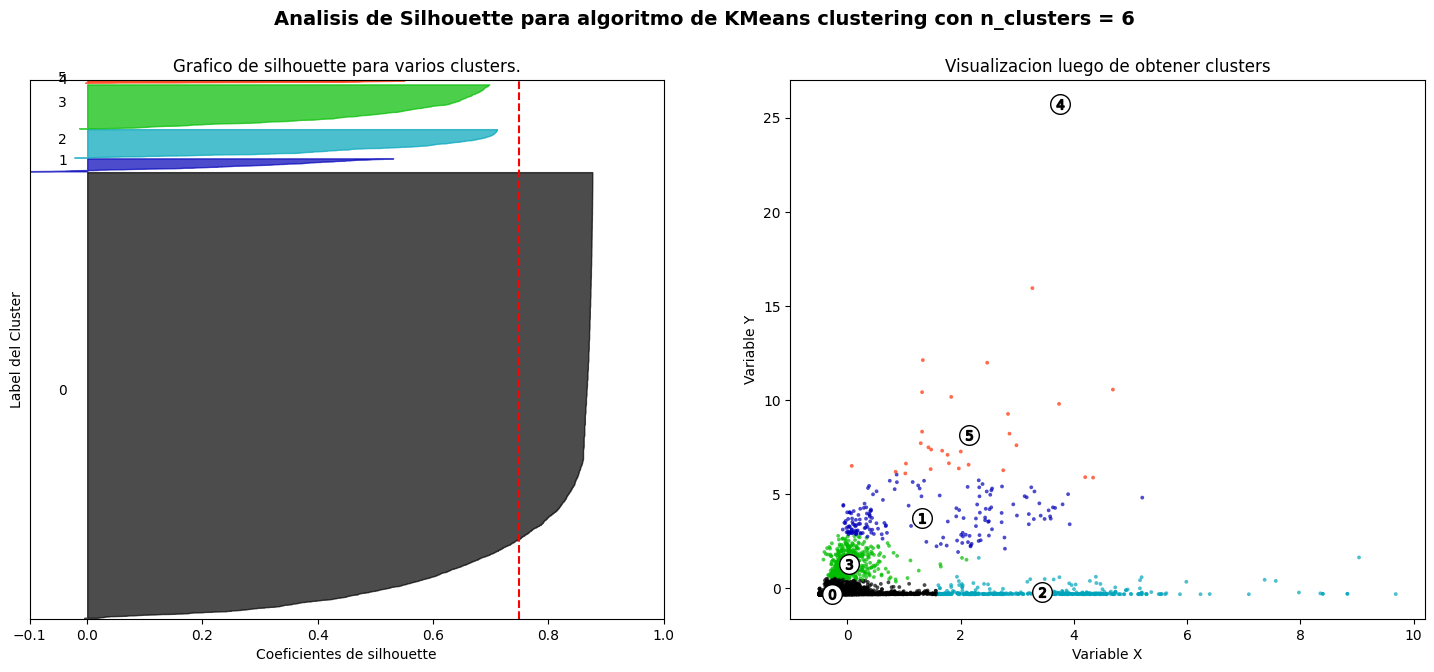

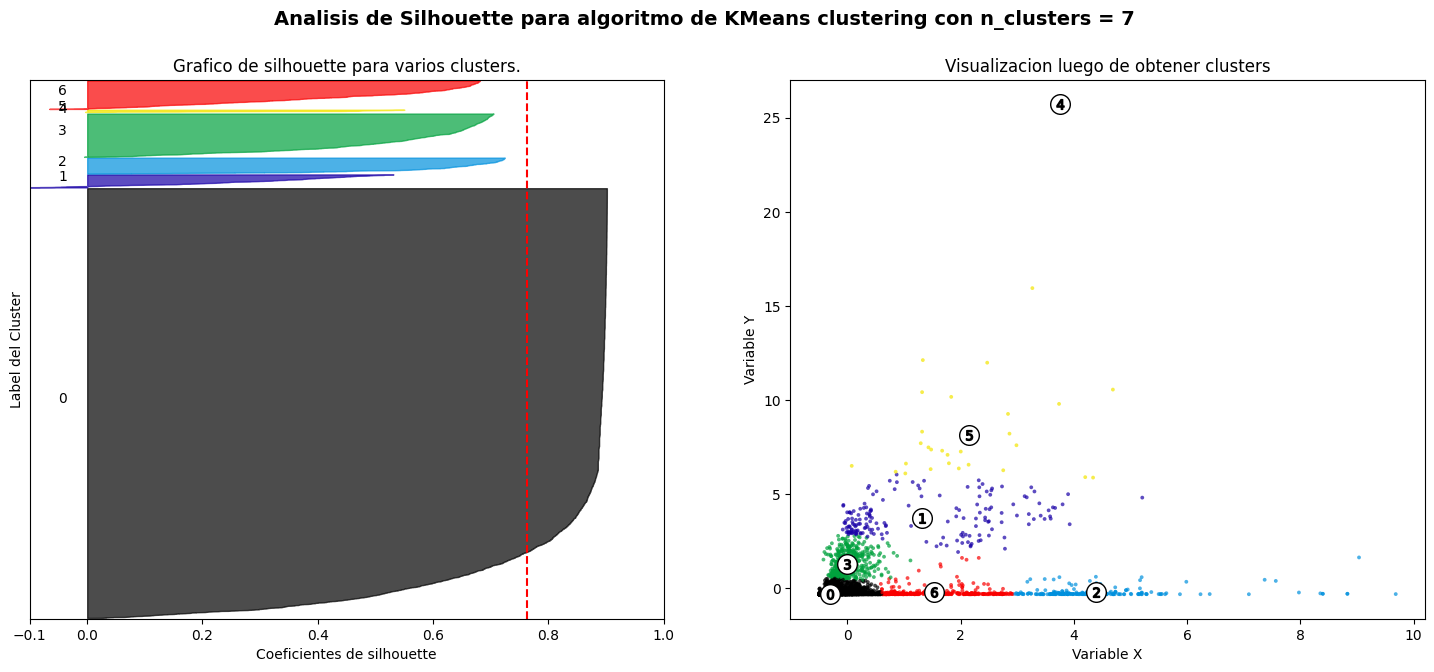

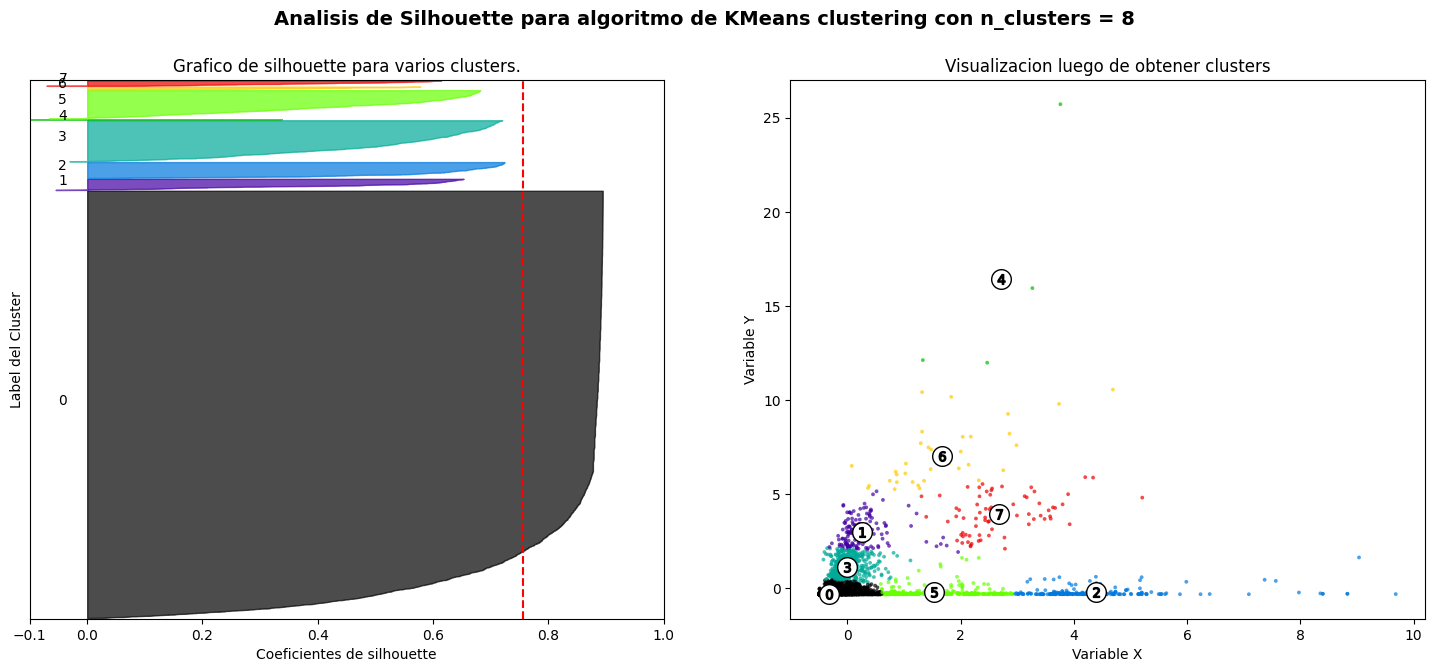

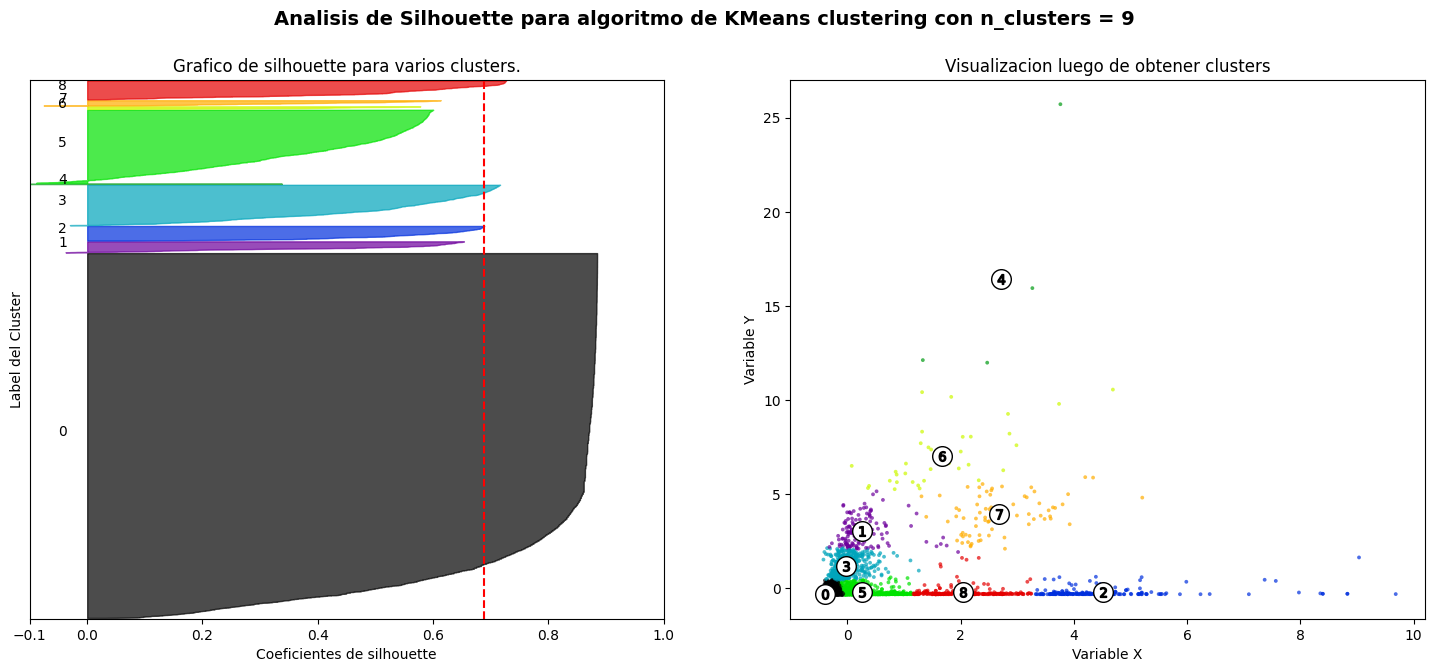

In [683]:
#ANALISIS DE silhouette PARA VARIOS CLUSTER

X1 = df[['num_reactions', 'num_shares']]

sc = StandardScaler()
sc.fit(X1)
X1 = sc.transform(X1)

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

#**IV-1. MODELO NO SUPERVISADO: sin outliers**

En el intento de mejorar la clasificación se realiza el mismo análisis excluyendo los valores extremos para las variables: num_reactions, num_comments y num_shares. Entendiendo que esas publicaciones se deben a situaciones puntuales y merecen un análisis independiente.

Al quitar del análisis los valores extremos la base de datos se reduce a 5060 publicaciones.

El análisis no presenta mejorias respecto al anterior.


In [766]:
#EXTRAER VALORES EXTREMOS

#Extremos REACCIONES
q1_R = np.percentile(df['num_reactions'], 25)
q3_R = np.percentile(df['num_reactions'], 75)
iqr_R = q3_R - q1_R
limite_superior_R = q3_R + 1.5 * iqr_R


#Extremos en la COMENTARIOS
q1_C = np.percentile(df['num_comments'], 25)
q3_C = np.percentile(df['num_comments'], 75)
iqr_C = q3_C - q1_C
limite_superior_C = q3_C + 1.5 * iqr_C


#Extremos COMPARTIR
q1_S = np.percentile(df['num_shares'], 25)
q3_S = np.percentile(df['num_shares'], 75)
iqr_S = q3_S - q1_S
limite_superior_S = q3_S + 1.5 * iqr_S

#ELIMINO

df_nuevo = df[~((df['num_reactions'] > limite_superior_R) |
          (df['num_comments'] > limite_superior_C) |
           (df['num_shares'] > limite_superior_S))]


In [767]:
#DEFINIMOS X

X_nuevo = df_nuevo[['num_reactions', 'num_shares']]

In [768]:
#NORMALIZAMOS LOS DATOS

sc = StandardScaler()
sc.fit(X_nuevo)
X_nuevo = sc.transform(X_nuevo)

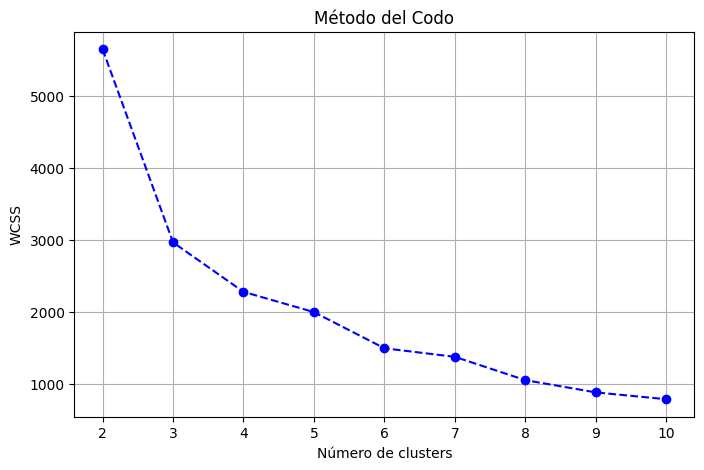

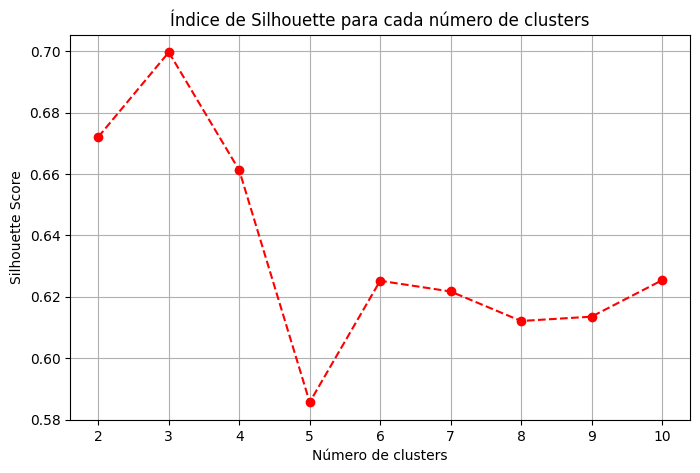

In [769]:
#APLICAMOS METODO DEL CODO Y SILUETA PARA DEFINIR CANTIDAD DE CLUSTER

# Método del Codo para encontrar el número óptimo de clusters
wcss = []
silhouette_scores = []  # Lista para almacenar los valores de Silhouette

for i in range(2, 11):  # Comenzamos desde 2 porque silhouette_score no se calcula con 1 cluster
    kmeans_nuevo = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters = kmeans_nuevo.fit_predict(X_nuevo)
    wcss.append(kmeans_nuevo.inertia_)

    # Calcular índice de Silhouette y almacenarlo
    score = silhouette_score(X_nuevo, clusters)
    silhouette_scores.append(score)

# Gráfico del Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Gráfico del Índice de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Índice de Silhouette para cada número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [770]:
#AJUSTAMOS K-MEANS

# Creando el k-Means para los 3 grupos encontrados
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X_nuevo)

In [771]:
df_nuevo['pred']=y_kmeans
df_nuevo

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
1          0.031847      0.000000         0.0   0.031847   0.000000  0.000000   
3          0.023567      0.000000         0.0   0.023567   0.000000  0.000000   
4          0.045223      0.000000         0.0   0.043312   0.013699  0.000000   
5          0.046072      0.000286         0.0   0.044798   0.007610  0.003597   
8          0.043100      0.000048         0.0   0.042038   0.007610  0.000000   
...             ...           ...         ...        ...        ...       ...   
7044       0.018259      0.000000         0.0   0.018259   0.000000  0.000000   
7045       0.018896      0.000000         0.0   0.018896   0.000000  0.000000   
7046       0.003397      0.000000         0.0   0.002972   0.001522  0.000000   
7047       0.000425      0.000000         0.0   0.000212   0.001522  0.000000   
7049       0.003609      0.000000         0.0   0.003609   0.000000  0.000000   

      num_hahas  num_sads  num_angrys status_type  status_num  pred  
1      0.000000       0.0         0.0       photo           1     1  
3      0.000000       0.0         0.0       photo           1     1  
4      0.000000       0.0         0.0       photo           1     2  
5      0.000000       0.0         0.0       photo           1     2  
8      0.000000       0.0         0.0       photo           1     2  
...         ...       ...         ...         ...         ...   ...  
7044   0.000000       0.0         0.0       photo           1     1  
7045   0.000000       0.0         0.0       photo           1     1  
7046   0.006369       0.0         0.0       photo           1     1  
7047   0.000000       0.0         0.0       photo           1     1  
7049   0.000000       0.0         0.0       photo           1     1  

[5060 rows x 12 columns]

In [772]:
Grupo_0 = df_nuevo[df_nuevo['pred'] == 0]
Grupo_1 = df_nuevo[df_nuevo['pred'] == 1]
Grupo_2 = df_nuevo[df_nuevo['pred'] == 2]
#Grupo_3 = df_nuevo[df_nuevo['pred'] == 3]
#Grupo_4 = df_nuevo[df_nuevo['pred'] == 4]
#Grupo_5 = df_nuevo[df_nuevo['pred'] == 5]
#Grupo_6 = df[df['pred'] == 6]
#Grupo_7 = df[df['pred'] == 7]

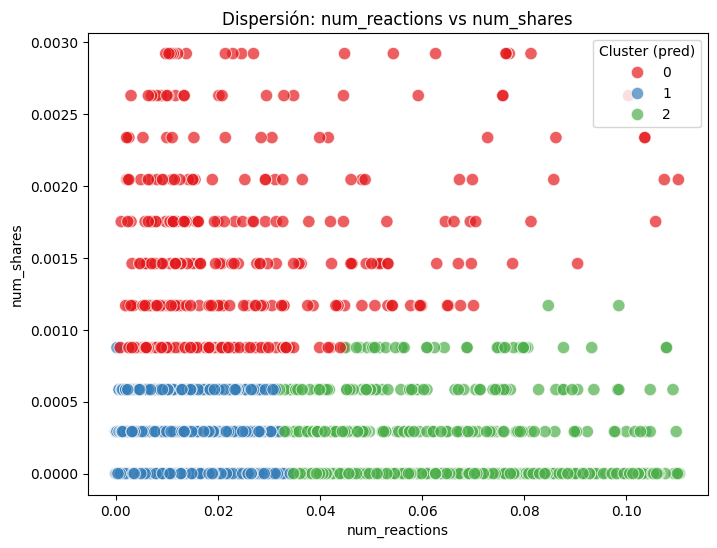

In [691]:
#GRÁFICO DE DISPERSIÓN

# Definir combinaciones de variables
pairs = [('num_reactions', 'num_shares')]

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar dispersión con colores según 'pred'
x_var, y_var = pairs[0]  # Extraemos la combinación de variables
sns.scatterplot(data=df_nuevo, x=x_var, y=y_var, hue="pred", palette="Set1", alpha=0.7, s=80, ax=ax)

# Título y etiquetas
ax.set_title(f'Dispersión: {x_var} vs {y_var}')
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)

# Mostrar la leyenda
plt.legend(title="Cluster (pred)")
plt.show()

In [773]:
df_nuevo.shape

(5060, 12)

In [775]:
#ANALISIS DE CLUSTER POR STATUS (eje horizontal suma 100%)

# Crear la tabla de conteo
conteo_tabla = df_nuevo.groupby(['pred', 'status_type']).size().unstack()
# Convertir a porcentaje fila
porcentaje_tabla = conteo_tabla.div(conteo_tabla.sum(axis=1), axis=0) * 100
porcentaje_tabla


status_type      link      photo    status      video
pred                                                 
0            3.151862  55.300860  4.297994  37.249284
1            0.806255  76.667481  4.764232  17.762033
2            0.161812  72.653722  4.692557  22.491909

In [776]:
#ANALISIS DE CLUSTER POR VARIABLES CONTINUAS

campos_interes = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

# Ajusta según tus variables
promedios_cluster = df_nuevo.groupby('pred')[campos_interes].median()

print(promedios_cluster)


      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
pred                                                                            
0          0.016561      0.000191     0.00146   0.016348   0.000000       0.0   
1          0.004459      0.000048     0.00000   0.004459   0.000000       0.0   
2          0.055839      0.000381     0.00000   0.053715   0.004566       0.0   

      num_hahas  num_sads  num_angrys  
pred                                   
0           0.0       0.0         0.0  
1           0.0       0.0         0.0  
2           0.0       0.0         0.0  


Para n_clusters = 2 El promedio del score de silhouette es:  0.6720778942059314
Para n_clusters = 3 El promedio del score de silhouette es:  0.6996421460638331
Para n_clusters = 4 El promedio del score de silhouette es:  0.6375950014524268
Para n_clusters = 5 El promedio del score de silhouette es:  0.6281735102257465
Para n_clusters = 6 El promedio del score de silhouette es:  0.6048823757138507
Para n_clusters = 7 El promedio del score de silhouette es:  0.6087106934432237
Para n_clusters = 8 El promedio del score de silhouette es:  0.5676182102897728
Para n_clusters = 9 El promedio del score de silhouette es:  0.6097913846812454


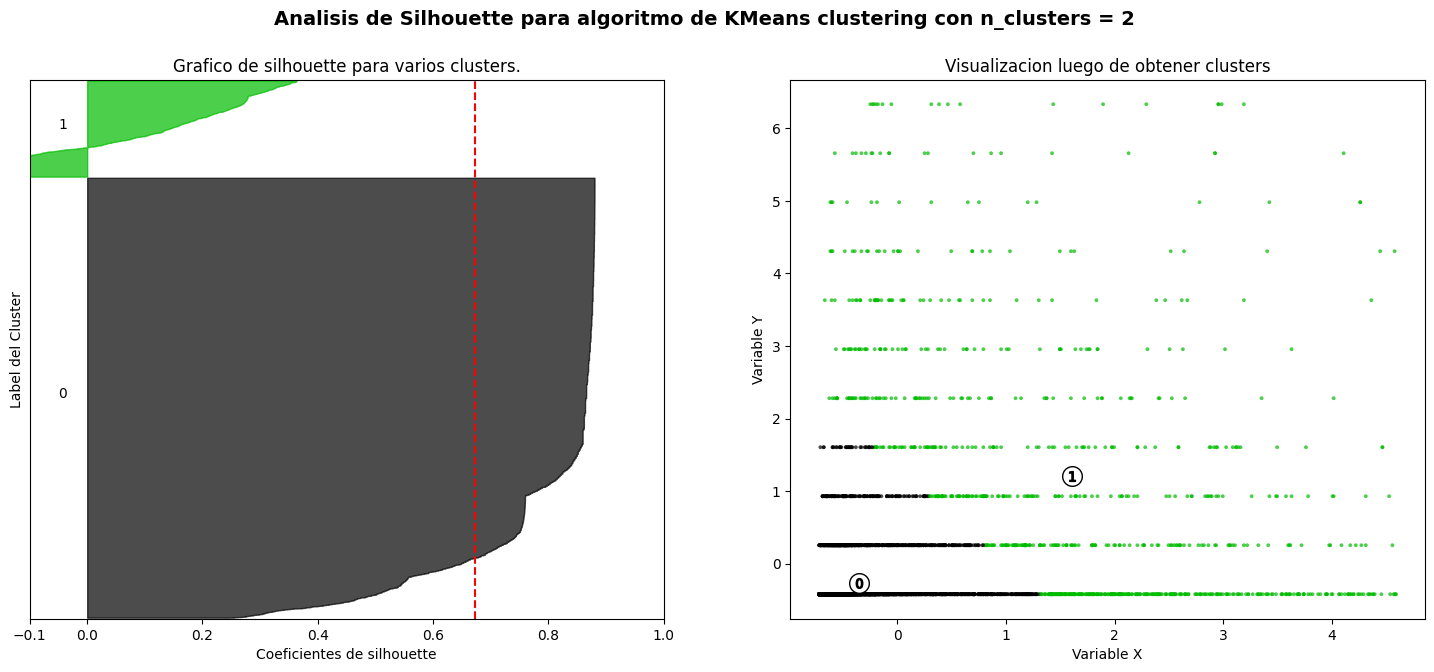

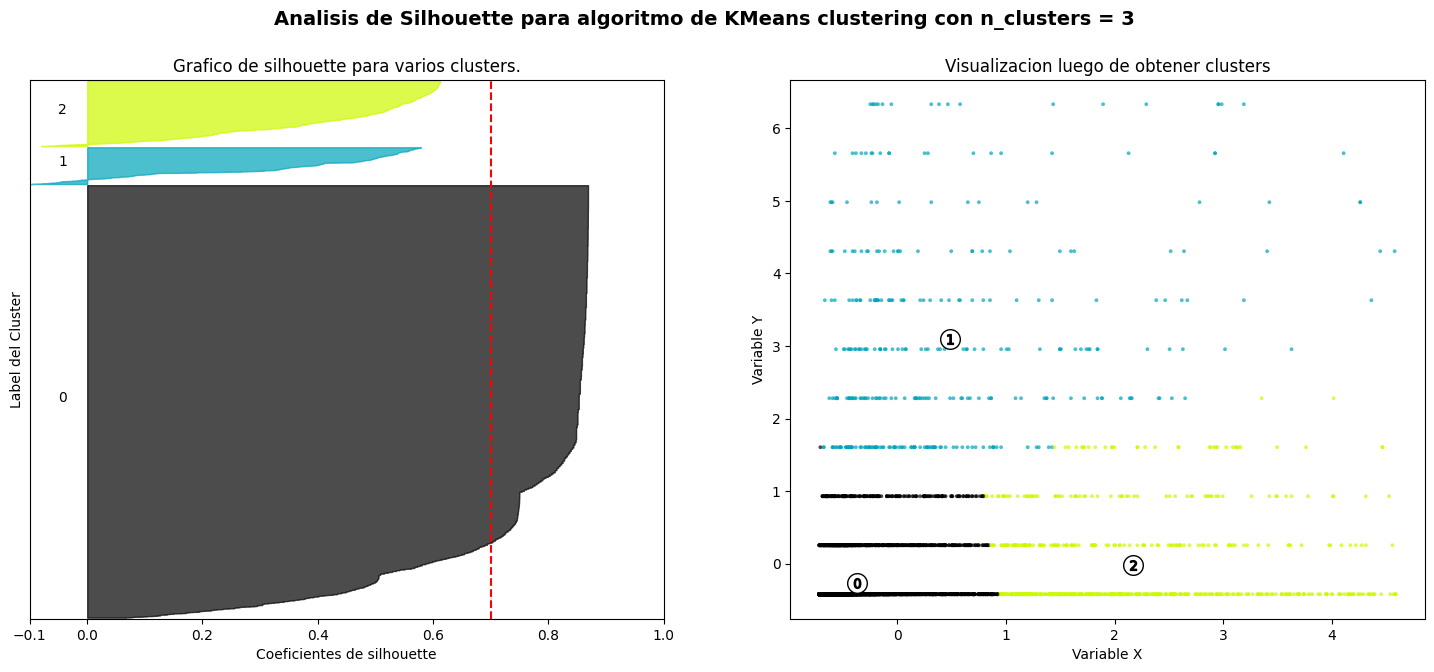

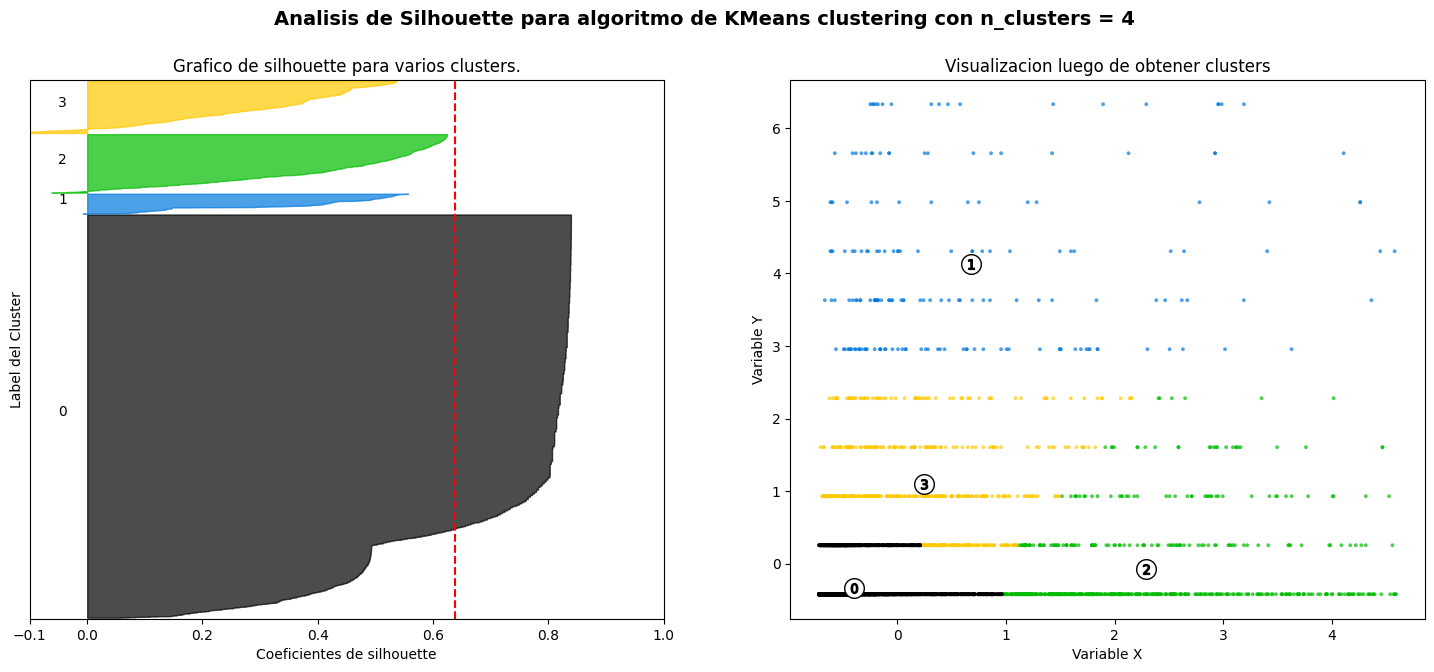

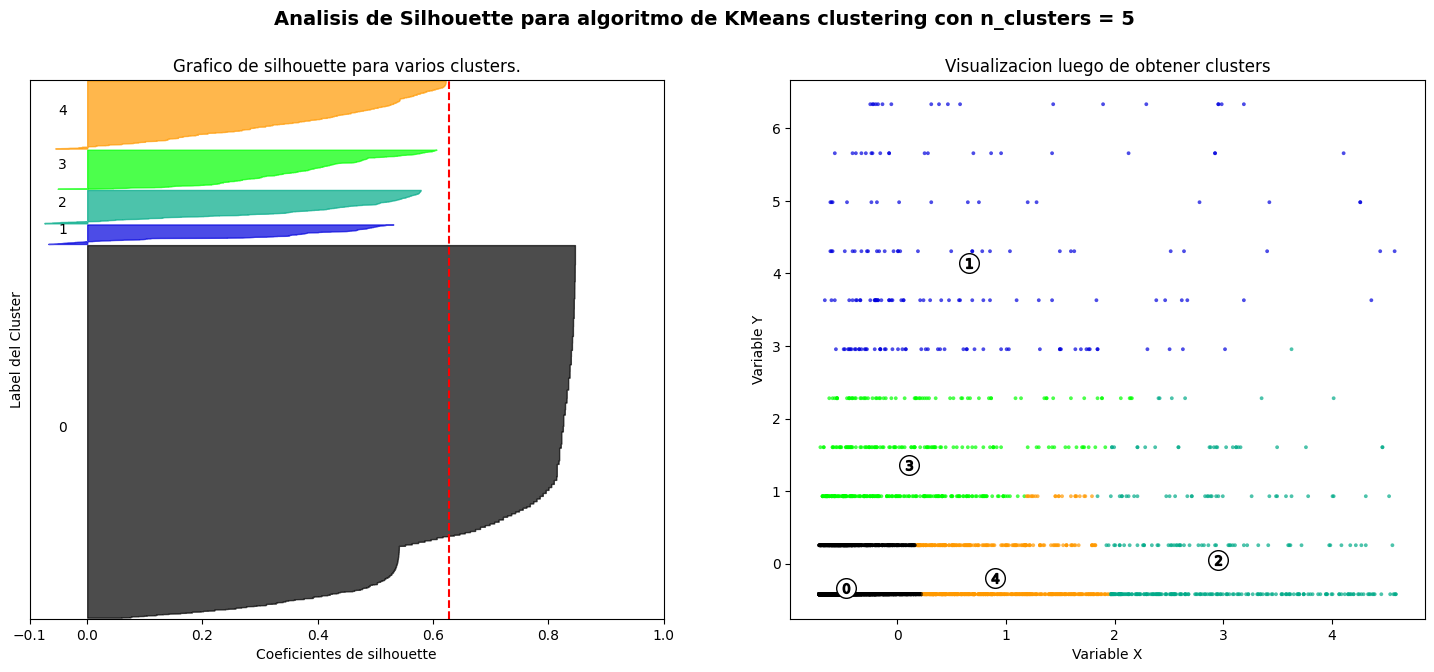

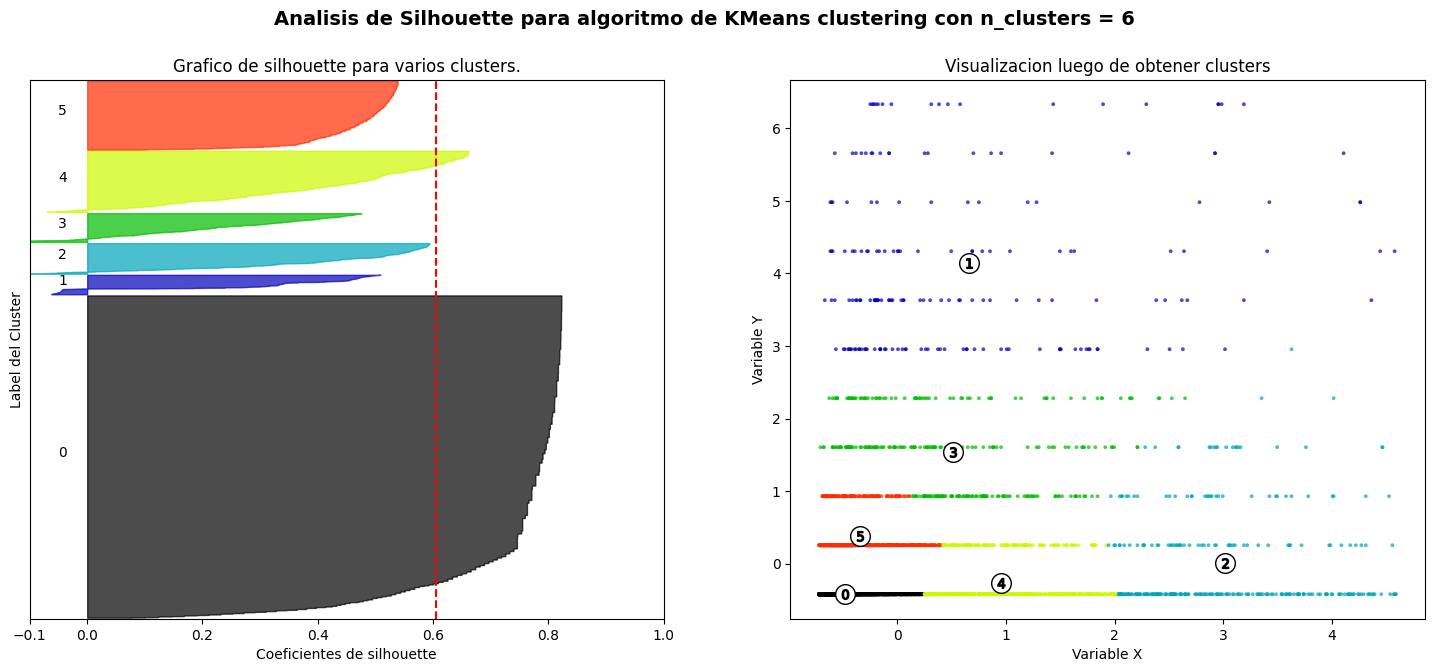

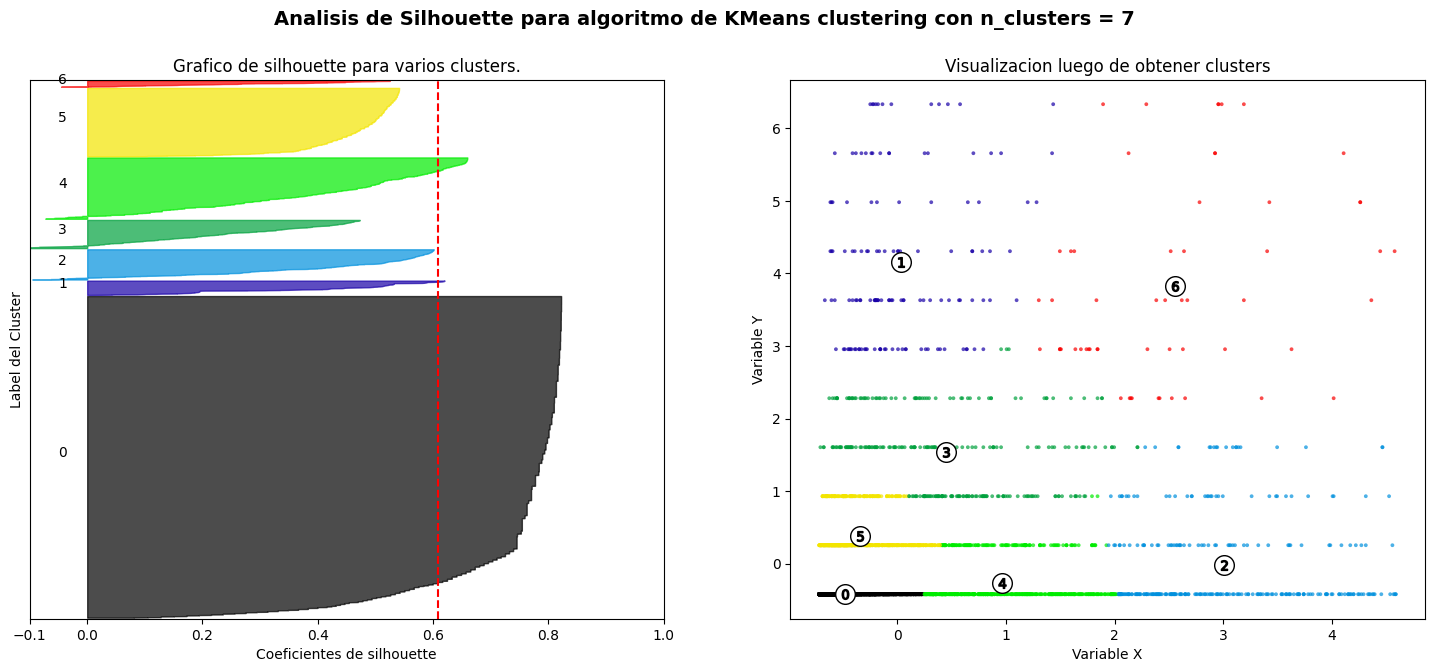

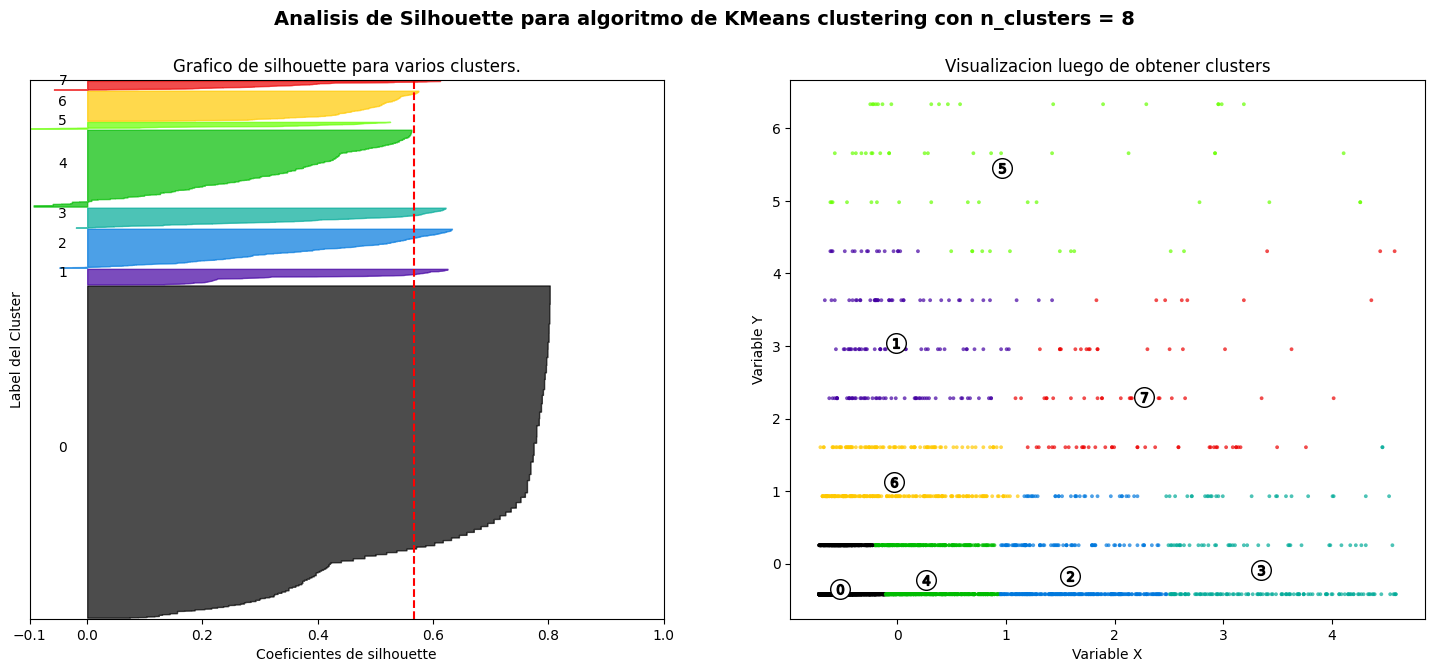

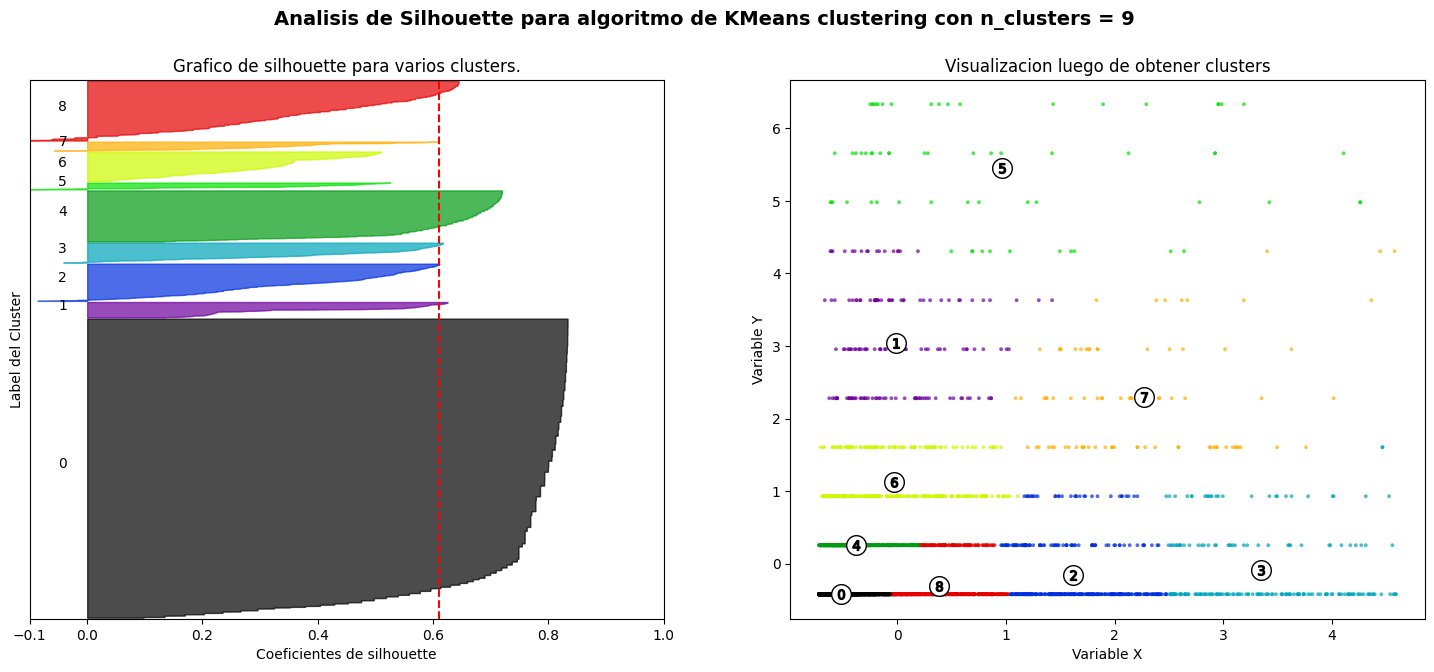

In [774]:
#ANALISIS DE silhouette PARA VARIOS CLUSTER

X1 = df_nuevo[['num_reactions', 'num_shares']]

sc = StandardScaler()
sc.fit(X1)
X1 = sc.transform(X1)

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

#**V. CONCLUSIONES**

Las variables en estudio tiene una capacidad de agrupación limitada por lo cual se recomienda ampliar el análisis con nuevas variables (por ejemplo el tipo de contenido). A pesar de las limitantes se puede puede desprender el siguiente análisis:

- La empresa debe cambiar rápidamente su estrategia de comunicación debido a que las mismas son principalmente fotos y videos y no están presentando visualizaciones, comentarios ni viralizaciones (cluster 0).

- Si se busca generar muchas reacciones y viralización del contenido se recomienda recurrir a videos con contenido que generen expresiones de amor o  afecto (cluster 1).

- Si se buscan solo reacciones sin necesidad de viralización se puede recurrir a fotos y videos. Un tipo de contenido que puede aportar el diferencial son las publicaciones con texto (cluster 2)

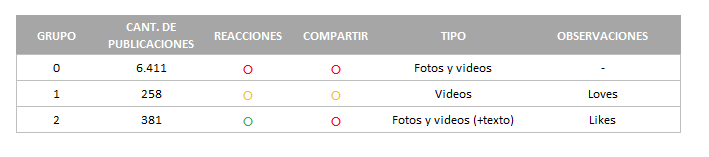




#**VI. COMENTARIOS FINALES**

"Aunque los anexos no incluyen el detalle completo, se presenta un resumen de otros modelos ajustados, los cuales no mostraron mejoras en el desempeño. En estos modelos, se realizó el análisis tanto con outliers como sin ellos, aplicando una transformación logarítmica a las variables en estudio. Esta transformación es útil cuando los datos presentan asimetría o contienen una gran cantidad de valores cercanos a cero.

Se recomienda explorar otros enfoques de agrupamiento no supervisado, como DBSCAN o HDBSCAN, que pueden ser más efectivos en la detección de estructuras de datos no esféricas y con ruido.

#**VII. ANEXOS**

Para n_clusters = 2 El promedio del score de silhouette es:  0.7817893605821207
Para n_clusters = 3 El promedio del score de silhouette es:  0.7973559695548775
Para n_clusters = 4 El promedio del score de silhouette es:  0.7684282590965702
Para n_clusters = 5 El promedio del score de silhouette es:  0.6903325912327105
Para n_clusters = 6 El promedio del score de silhouette es:  0.7026537563428418
Para n_clusters = 7 El promedio del score de silhouette es:  0.7055313553323811
Para n_clusters = 8 El promedio del score de silhouette es:  0.6832134792576322
Para n_clusters = 9 El promedio del score de silhouette es:  0.6830551022184818


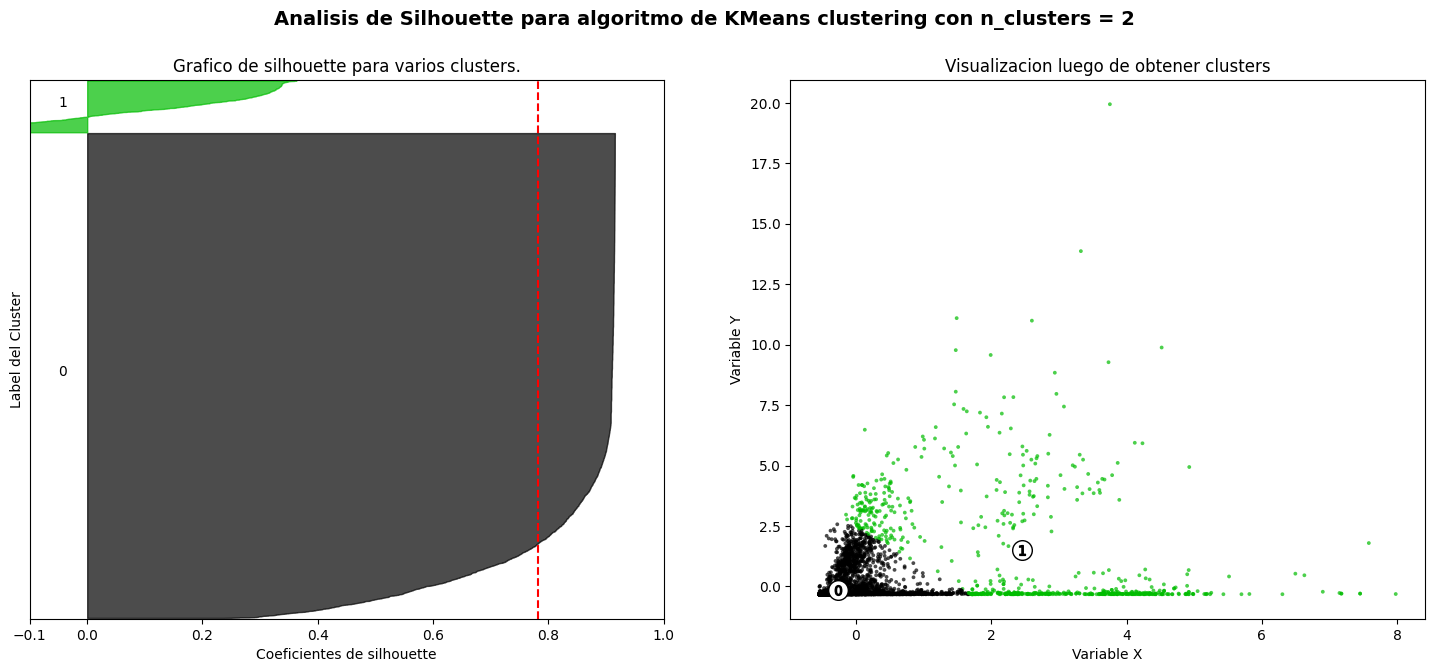

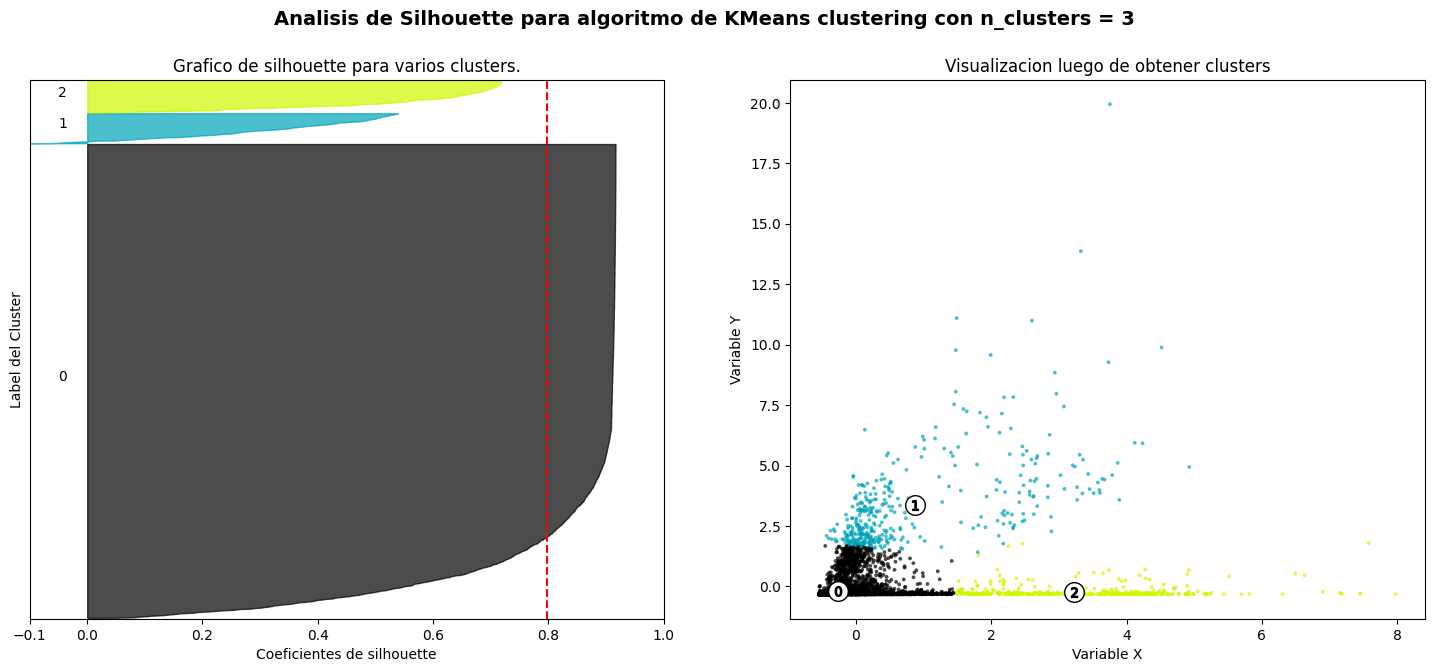

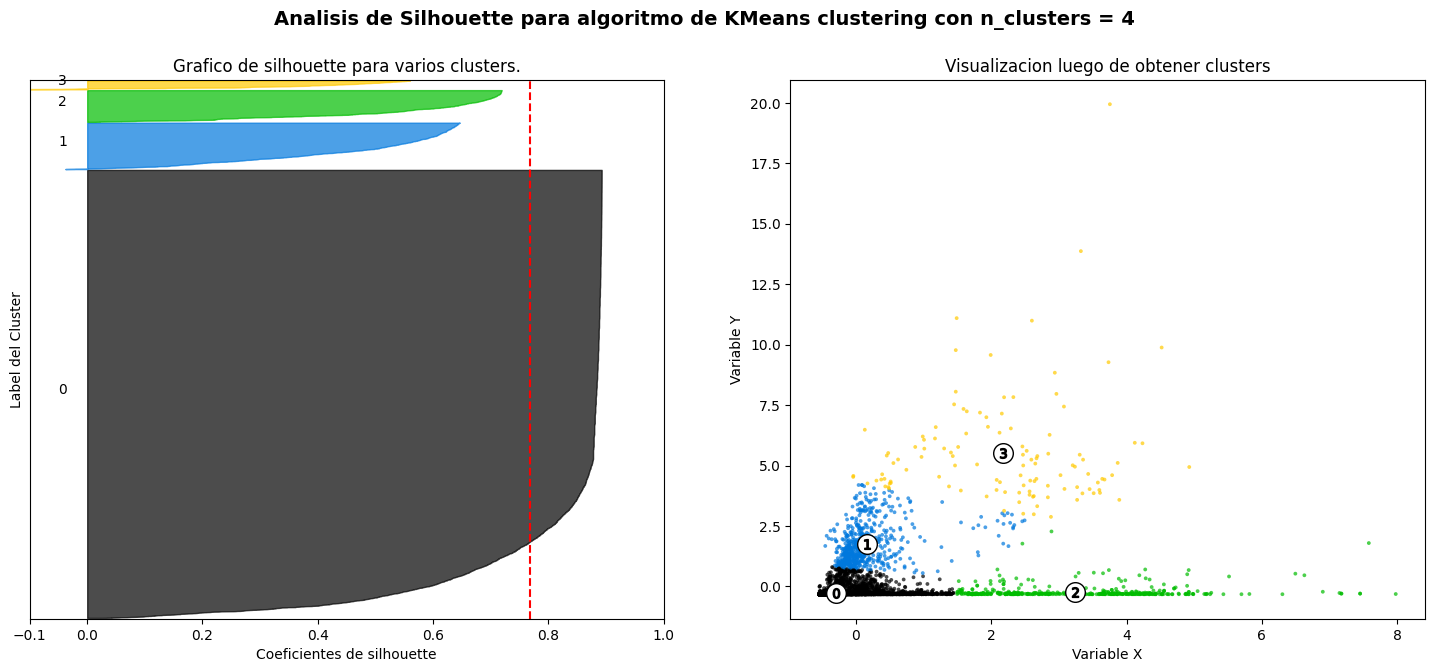

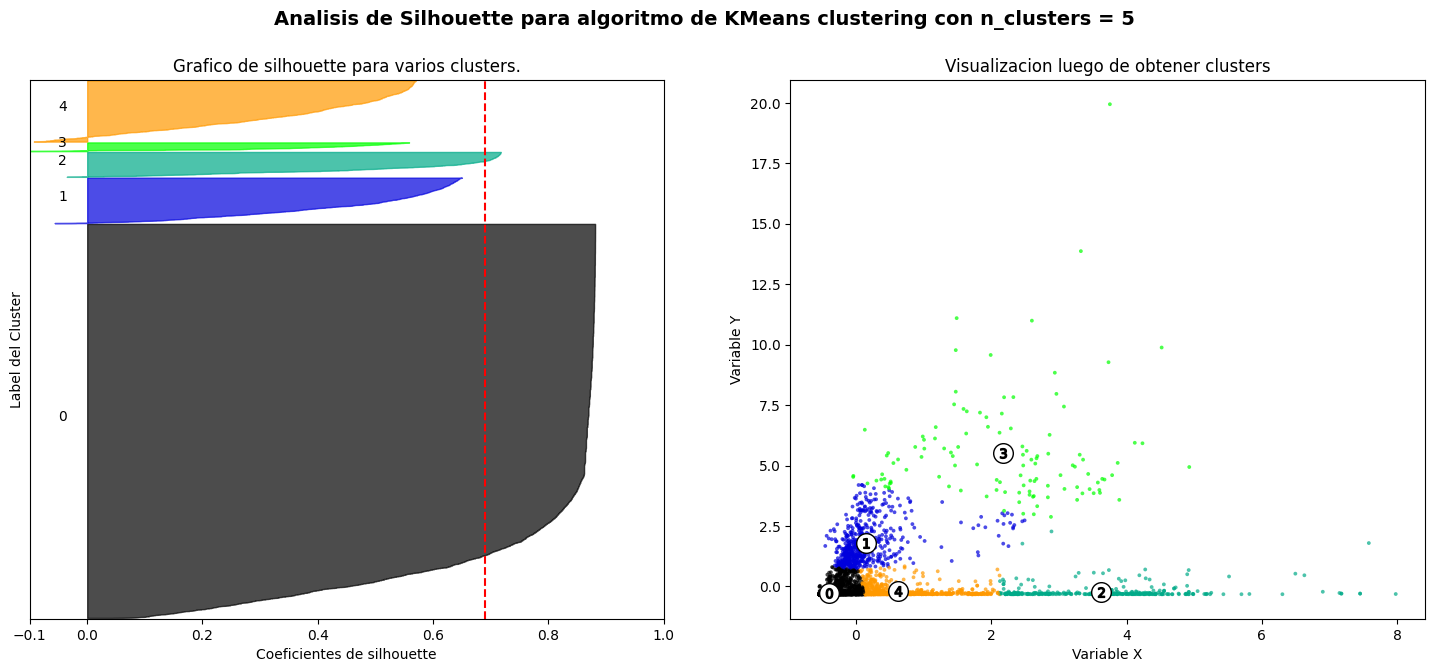

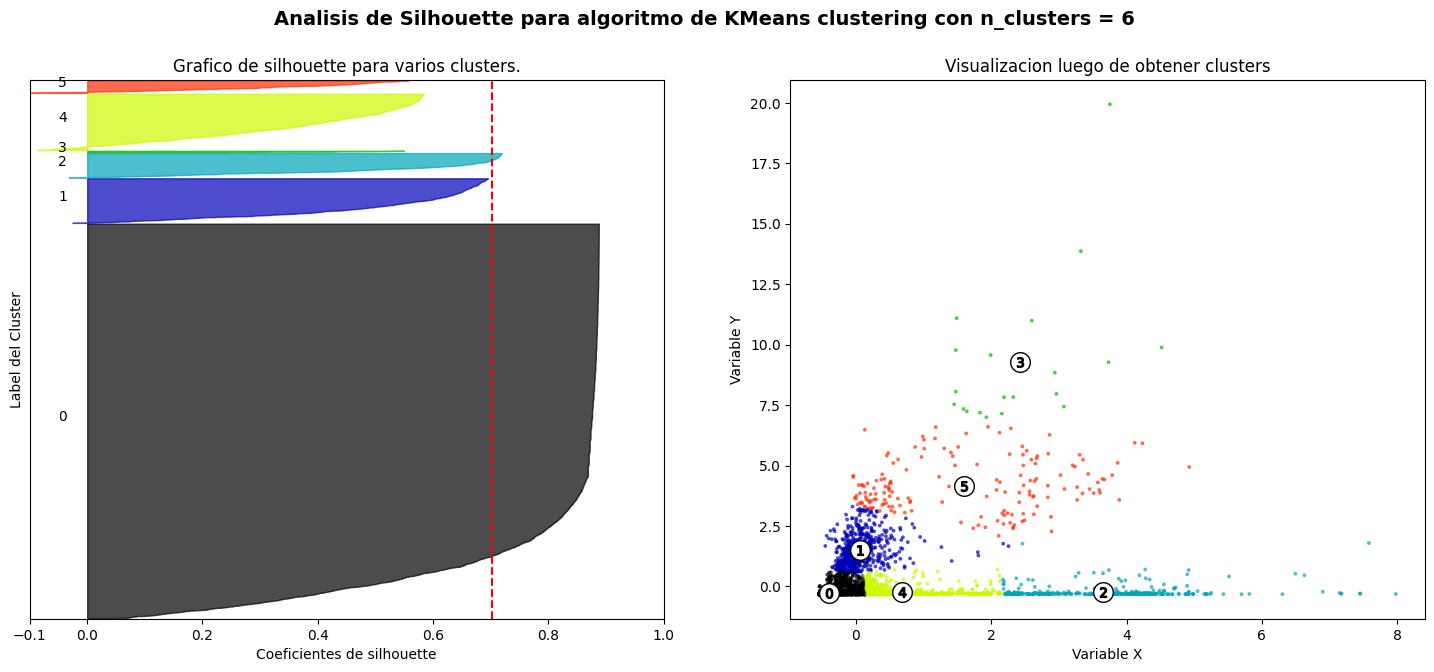

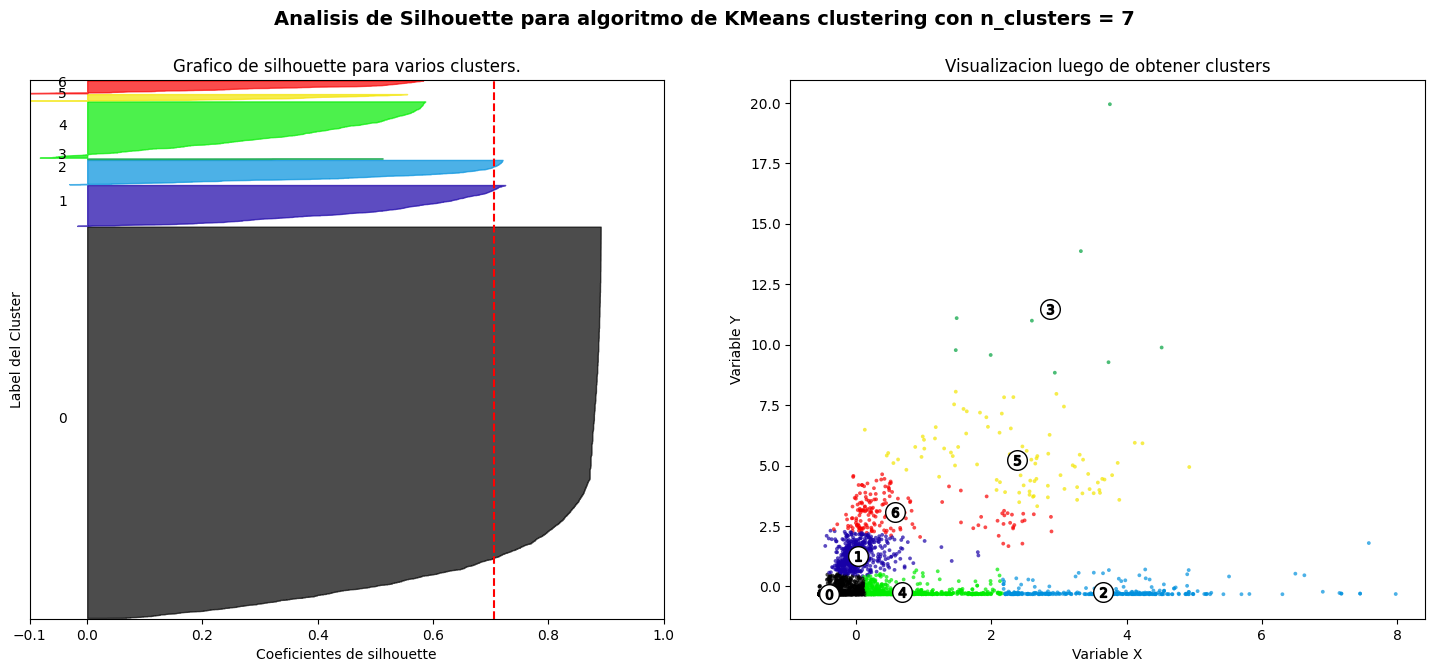

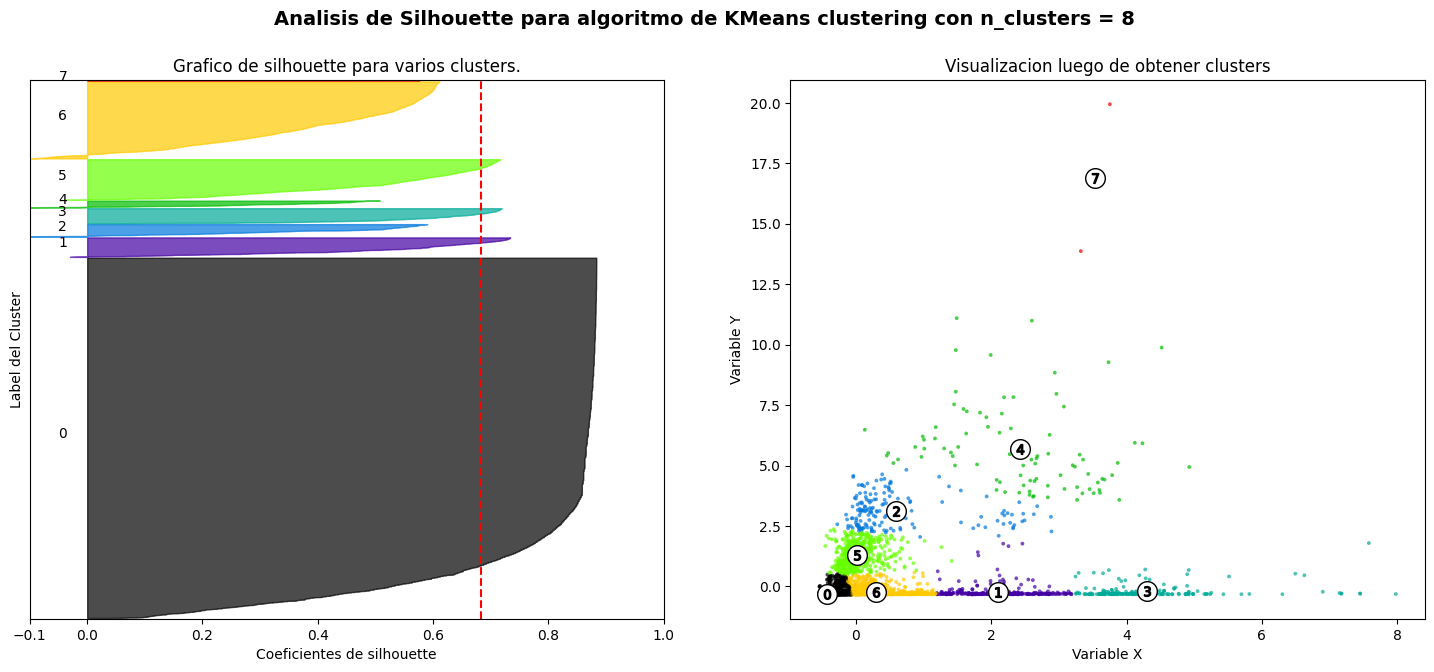

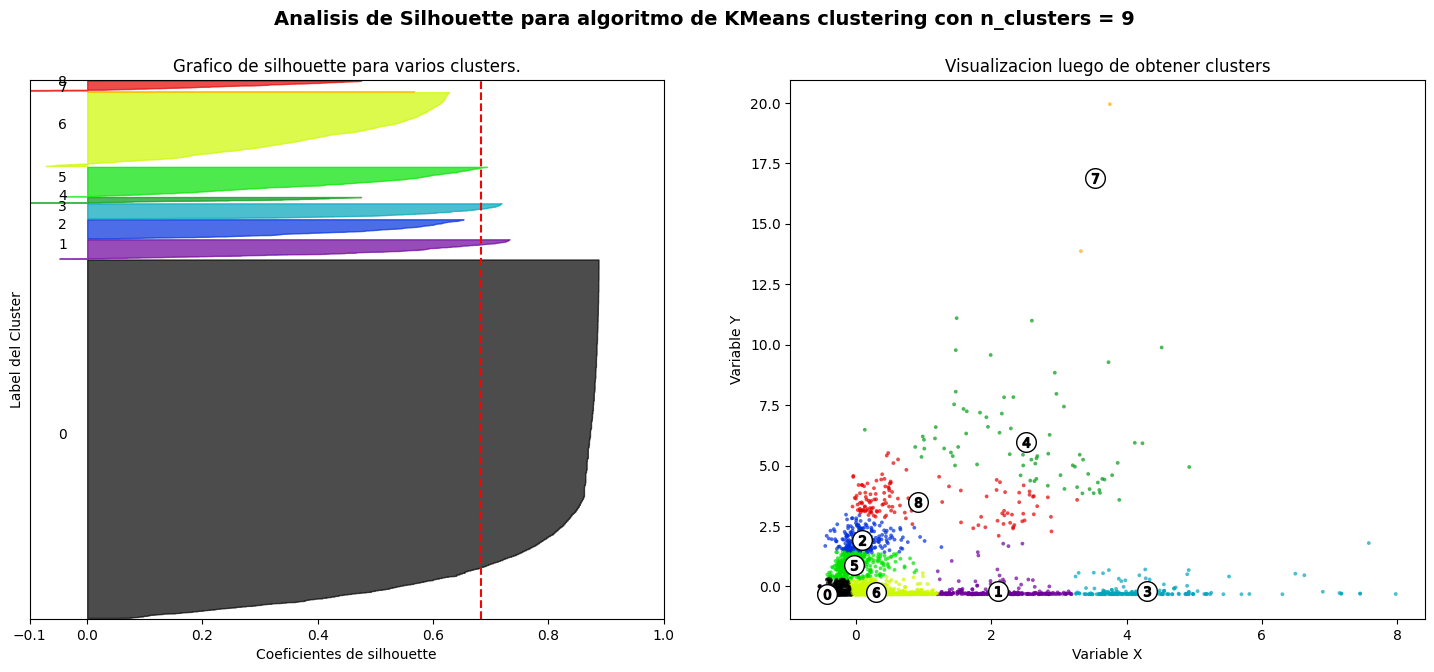

In [777]:
#ANEXO 1: MODELO CON OUTLIERS Y LOGARITMO

X2 = df[['num_reactions', 'num_shares']].apply(np.log1p)

sc = StandardScaler()
sc.fit(X2)
X2 = sc.transform(X2)

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X2[:, 0], X2[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


    #X = df.copy()
#X[['num_shares', 'num_comments']] = X[['num_shares', 'num_comments']].apply(np.log1p)
#X = X[['num_reactions', 'num_shares', 'num_comments']]


Para n_clusters = 2 El promedio del score de silhouette es:  0.6696763500302522
Para n_clusters = 3 El promedio del score de silhouette es:  0.6963844294568229
Para n_clusters = 4 El promedio del score de silhouette es:  0.6314526414781062
Para n_clusters = 5 El promedio del score de silhouette es:  0.6262596998720948
Para n_clusters = 6 El promedio del score de silhouette es:  0.6091788197583475
Para n_clusters = 7 El promedio del score de silhouette es:  0.6124040233876331
Para n_clusters = 8 El promedio del score de silhouette es:  0.6092459091125216
Para n_clusters = 9 El promedio del score de silhouette es:  0.612030711160116


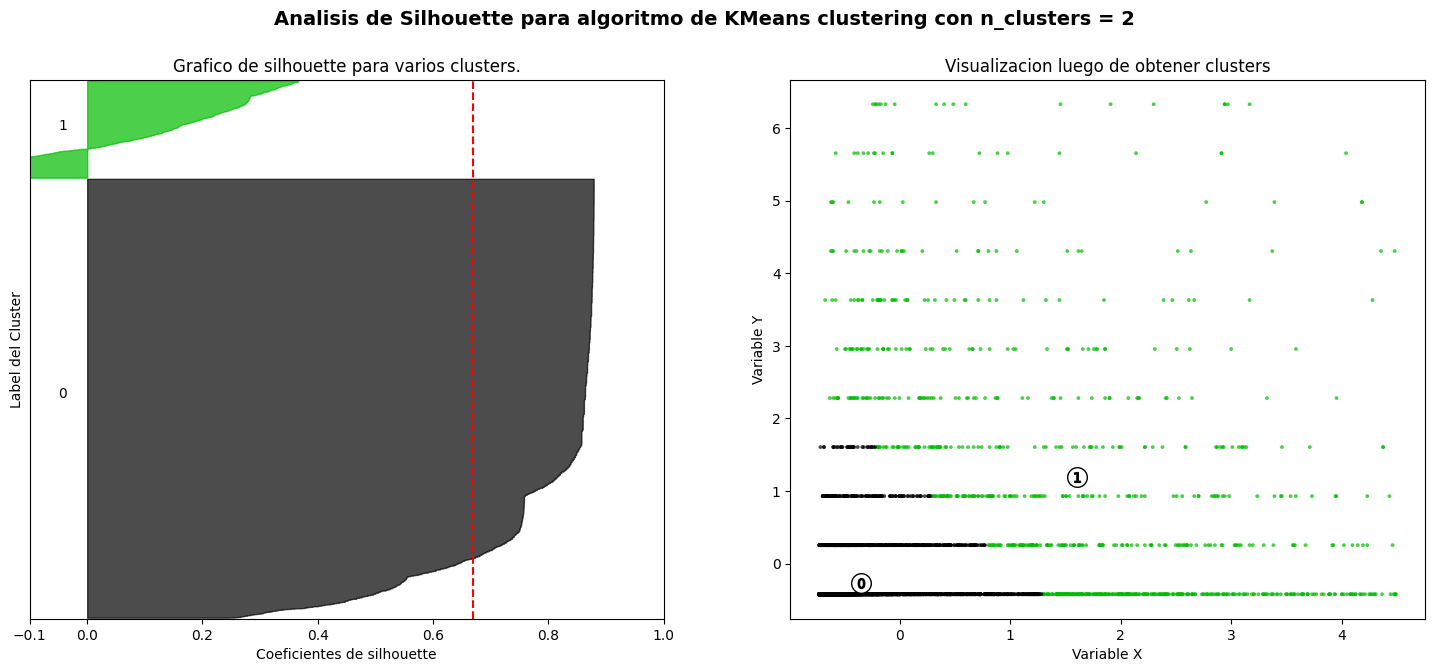

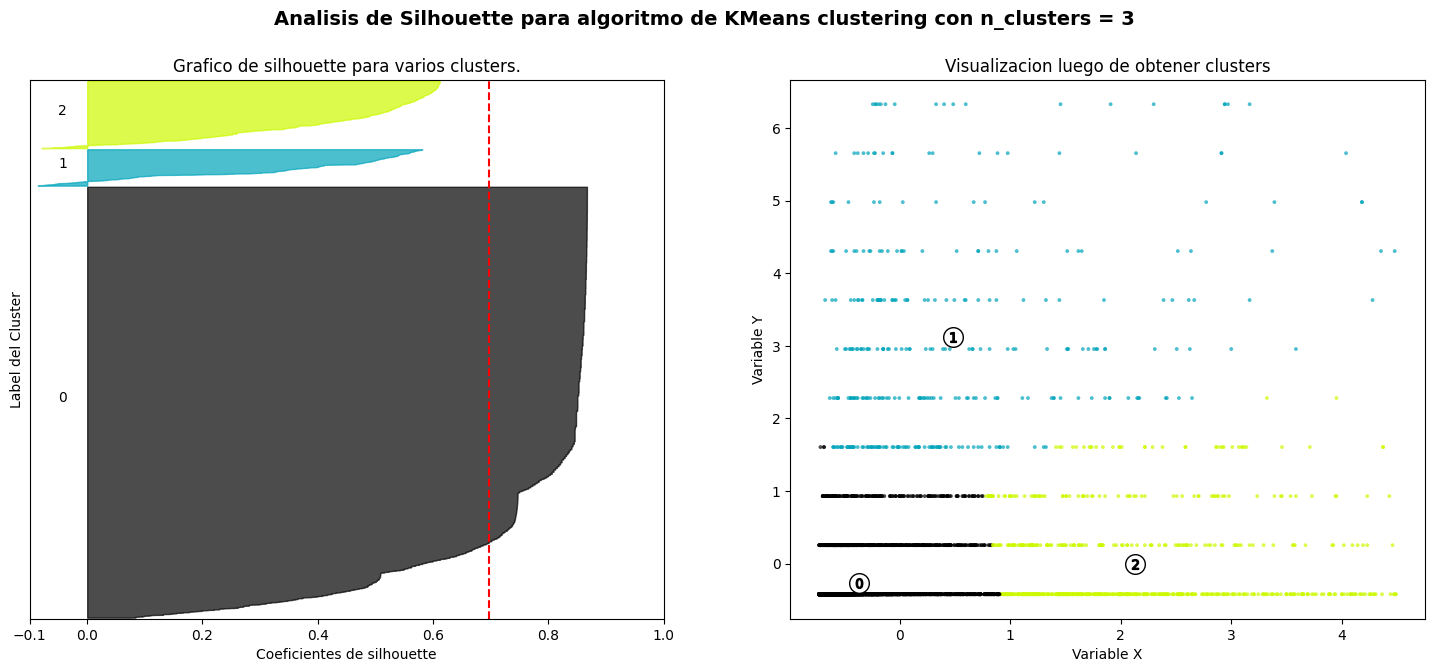

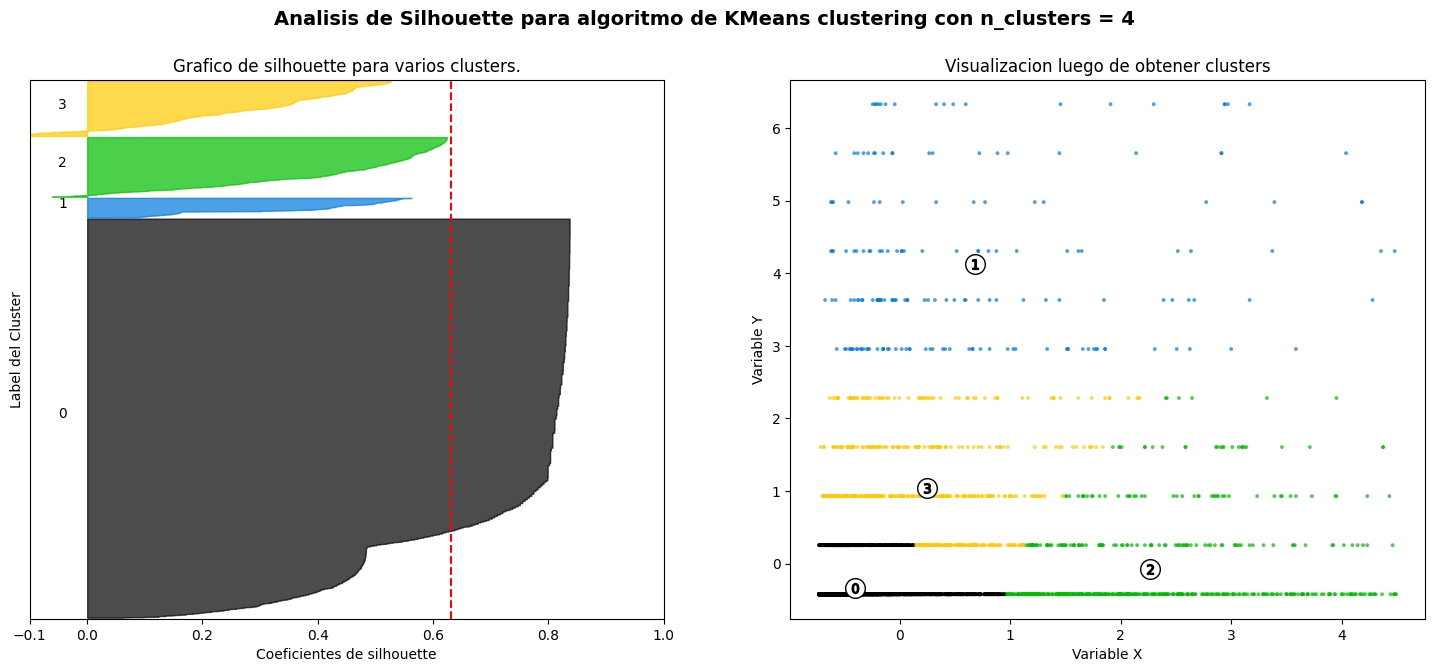

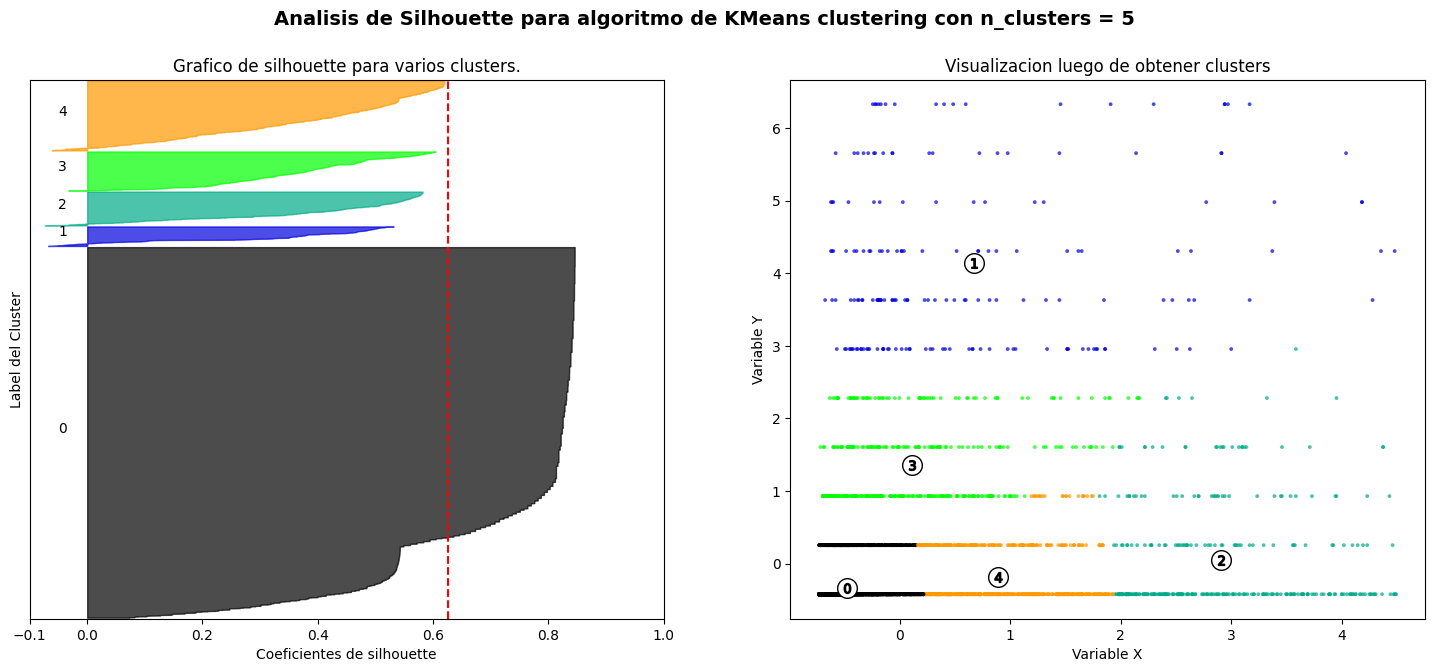

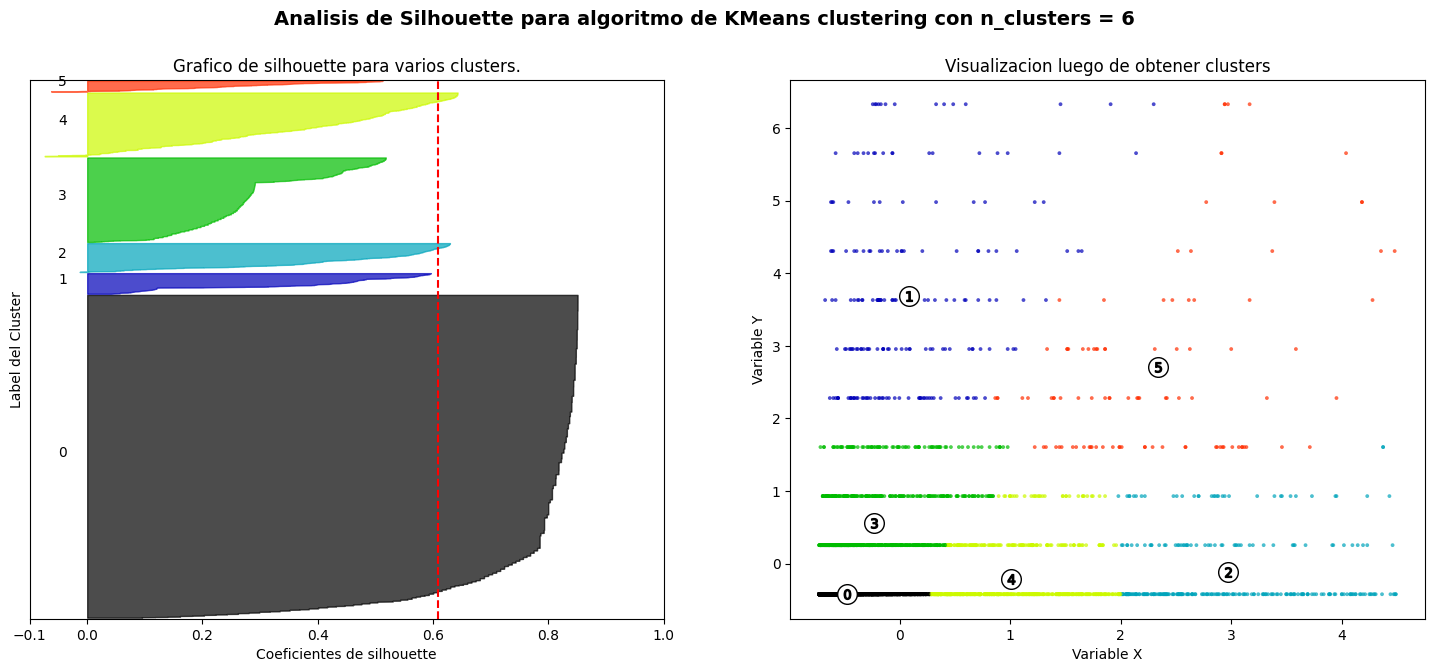

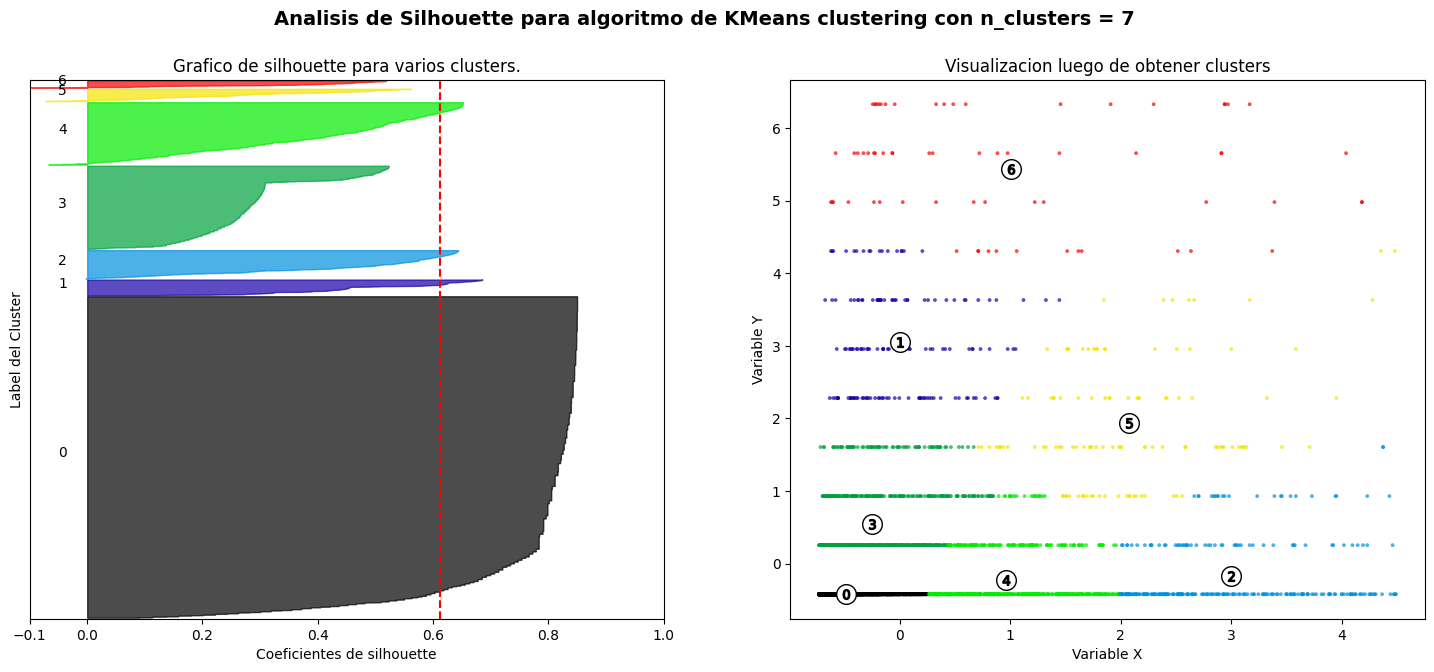

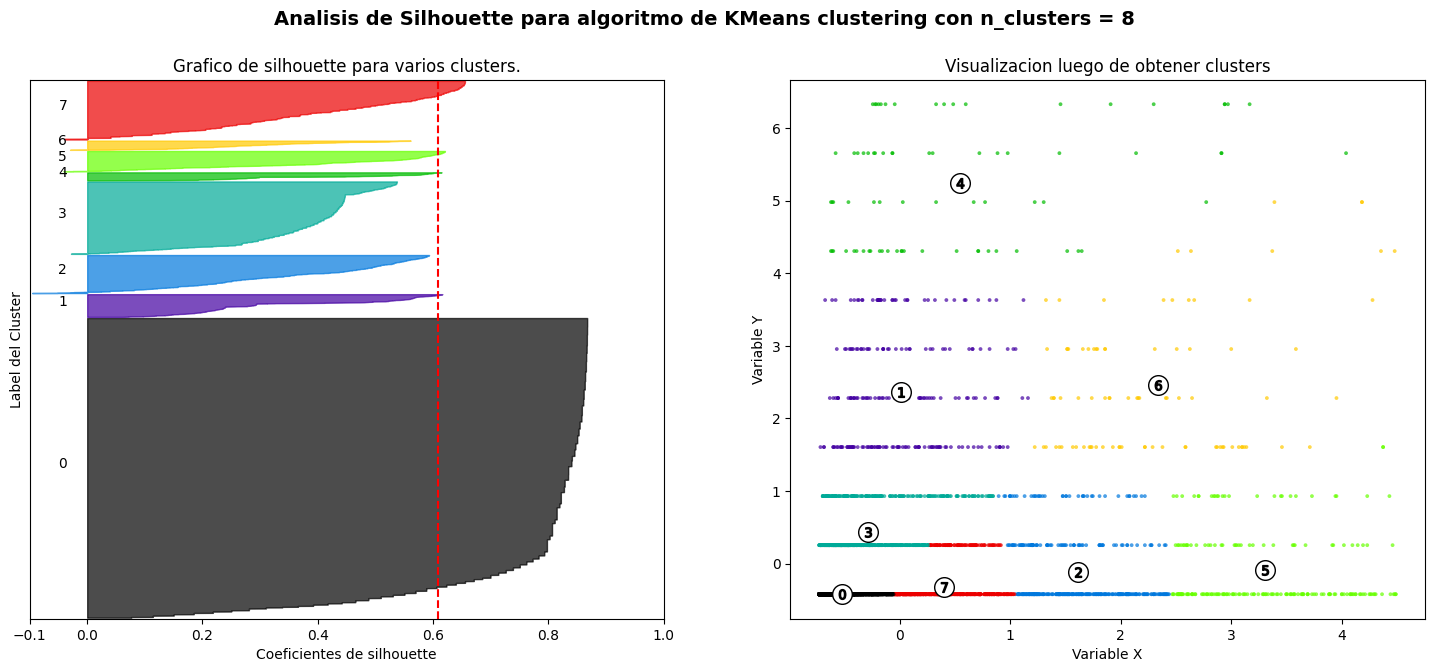

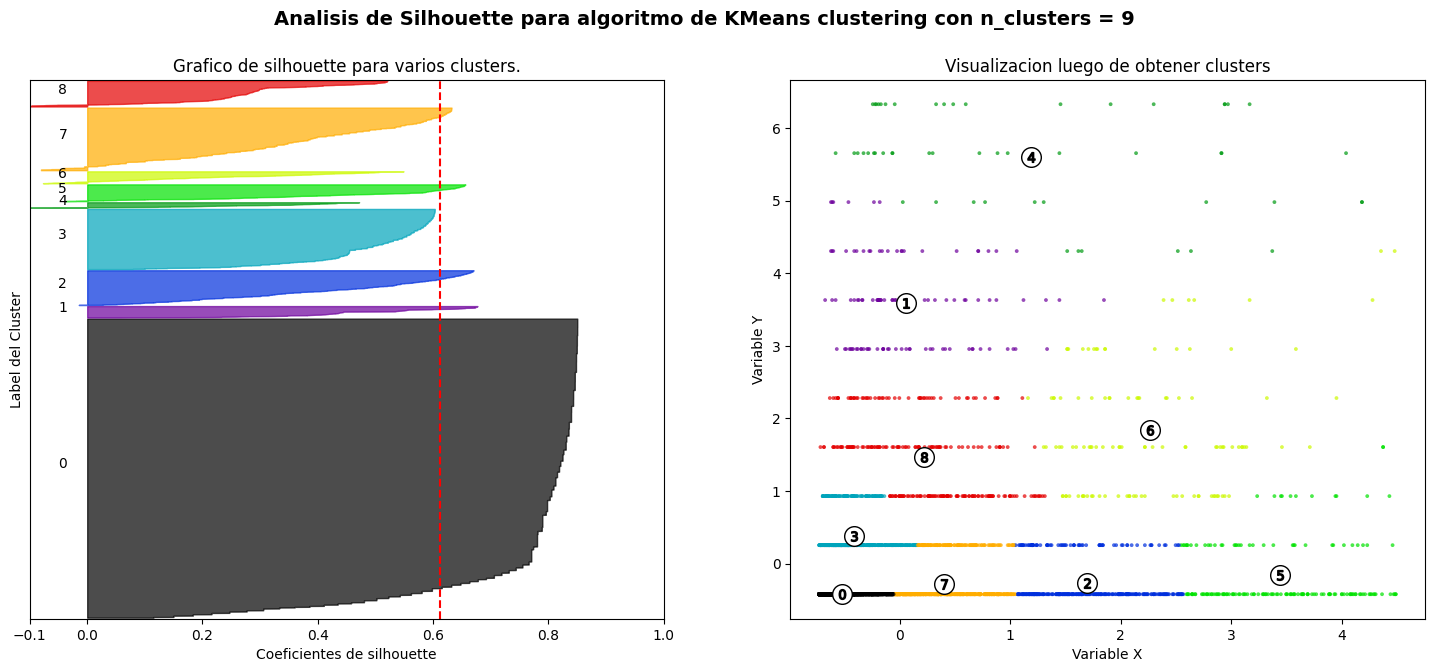

In [778]:
#ANEXO 2: MODELO SIN OUTLIERS Y LOGARITMO

X3 = df_nuevo[['num_reactions', 'num_shares']].apply(np.log1p)

sc = StandardScaler()
sc.fit(X3)
X3 = sc.transform(X3)

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X3) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X3)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X3, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X3[:, 0], X3[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


    #X = df.copy()
#X[['num_shares', 'num_comments']] = X[['num_shares', 'num_comments']].apply(np.log1p)
#X = X[['num_reactions', 'num_shares', 'num_comments']]
